In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
pd.set_option("display.float_format", "{:.2f}".format)

# Exercice partie 1 - Analysez des données de systèmes éducatifs

## Étapes 1. Chargez les données dans votre Notebook


In [28]:
country_series = pd.read_csv('data/EdStatsCountry-Series.csv')
country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [29]:
country = pd.read_csv('data/EdStatsCountry.csv')
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.00,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.00,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.00,2012.00,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.00,NaN,NaN


In [30]:
data = pd.read_csv('data/EdStatsData.csv')
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.82,54.89,56.21,57.27,57.99,59.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
foot_note = pd.read_csv('data/EdStatsFootNote.csv')
foot_note.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [32]:
series = pd.read_csv('data/EdStatsSeries.csv')
series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Étapes 2. Collectez des informations basiques sur chaque jeu de données

- EdStatsCountry-Series.csv = une ligne correspond à un **code pays**  
- EdStatsCountry.csv = une ligne correspond à un **code pays**  
- EdStatsData.csv = une ligne correspond à un **pays (nom)**  
- EdStatsFootNote.csv = une ligne correspond à un **code pays**  
- EdStatsSeries.csv = une ligne correspond à un **code de série**  

In [33]:
dfs = {
    "country_series": country_series,
    "country": country,
    "series": series,
    "data": data,
    "foot_note": foot_note
}

for name, df_tempo in dfs.items():
    print(f"=== {name} ===")
    print("  Nombre de lignes   :", df_tempo.shape[0])
    print("  Nombre de colonnes :", df_tempo.shape[1])
    print()

=== country_series ===
  Nombre de lignes   : 613
  Nombre de colonnes : 4

=== country ===
  Nombre de lignes   : 241
  Nombre de colonnes : 32

=== series ===
  Nombre de lignes   : 3665
  Nombre de colonnes : 21

=== data ===
  Nombre de lignes   : 886930
  Nombre de colonnes : 70

=== foot_note ===
  Nombre de lignes   : 643638
  Nombre de colonnes : 5



In [34]:
for name, df_tempo in dfs.items():
    print(f"=== {name} ===")
    print("  Nombre de doublons :", df_tempo.duplicated().sum())
    dfs[name] = df_tempo.drop_duplicates()
    print()

=== country_series ===
  Nombre de doublons : 0

=== country ===
  Nombre de doublons : 0

=== series ===
  Nombre de doublons : 0

=== data ===
  Nombre de doublons : 0
  Nombre de doublons : 0

=== foot_note ===
  Nombre de doublons : 0


=== foot_note ===
  Nombre de doublons : 0



In [35]:
for name, df_tempo in dfs.items():
   df_nan = pd.DataFrame(
      df_tempo.isna().mean()
   ).reset_index()
   print('Avant nettoyage de :', name, dfs[name].shape[1], 'colonnes')
   dfs[name] = df_tempo.drop(columns=df_nan.loc[df_nan[0]==1, 'index'].values)
   print('Aprés nettoyage de :', name, dfs[name].shape[1], 'colonnes')


Avant nettoyage de : country_series 4 colonnes
Aprés nettoyage de : country_series 3 colonnes
Avant nettoyage de : country 32 colonnes
Aprés nettoyage de : country 31 colonnes
Avant nettoyage de : series 21 colonnes
Aprés nettoyage de : series 15 colonnes
Avant nettoyage de : data 70 colonnes
Aprés nettoyage de : country 31 colonnes
Avant nettoyage de : series 21 colonnes
Aprés nettoyage de : series 15 colonnes
Avant nettoyage de : data 70 colonnes
Aprés nettoyage de : data 69 colonnes
Avant nettoyage de : foot_note 5 colonnes
Aprés nettoyage de : foot_note 4 colonnes
Aprés nettoyage de : data 69 colonnes
Avant nettoyage de : foot_note 5 colonnes
Aprés nettoyage de : foot_note 4 colonnes


In [36]:
for name, df_tempo in dfs.items():
   print(name, " :")
   print(df_tempo.describe())
   print()


country_series  :
       CountryCode   SeriesCode  \
count          613          613   
unique         211           21   
top            MDA  SP.POP.TOTL   
freq            18          211   

                                              DESCRIPTION  
count                                                 613  
unique                                                 97  
top     Data sources : United Nations World Population...  
freq                                                  154  

country  :
       National accounts reference year  Latest industrial data  \
count                             32.00                  107.00   
mean                            2001.53                 2008.10   
std                                5.25                    2.62   
min                             1987.00                 2000.00   
25%                             1996.75                 2007.50   
50%                             2002.00                 2009.00   
75%                      

In [37]:
for name, df_tempo in dfs.items():
   print(name, " :")
   for col in df_tempo.select_dtypes(include="object").columns:
    print(f"--- {col} ---")
    print(df_tempo[col].value_counts())
    print()


country_series  :
--- CountryCode ---
CountryCode
MDA    18
GEO    18
CYP    12
SRB    12
MUS    12
       ..
GRL     2
GTM     2
GUM     2
HKG     2
ZWE     2
Name: count, Length: 211, dtype: int64

--- SeriesCode ---
SeriesCode
SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.MKTP.PP.KD     14
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.0014.TO.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.1564.TO.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.FE.IN      4
Name: count, dtype: int64

--- DESCRIPTION ---
DESCRIPTION
Data sources : United Nations World Population Prospects                                                                                     154
Data sources: United Nations World Popula

## Étapes 3. Collectez des informations basiques sur chaque jeu de données

J’ai une liste manuelle de “faux pays” (agrégats : World, Euro area, High income, etc.).

Je construis la liste des vrais pays en enlevant ces libellés de la table Country.

Je récupère ensuite les codes ISO3 valides depuis Country, puis je filtre avec .isin(...).

In [38]:
pays = country['Table Name'].unique()
print(pays)

['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Switzerland' 'Channel Islands'
 'Chile' 'China' "Côte d'Ivoire" 'Cameroon' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Colombia' 'Comoros' 'Cabo Verde' 'Costa Rica' 'Cuba'
 'Curaçao' 'Cayman Islands' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria' 'East Asia & Pacific'
 'East Asia & Pacific (all income levels)' 'Europe & Central Asia'
 'Europe & Central Asia (all income levels)' 'Ecuador' 'Egypt, Arab Rep.'
 'Euro area' 'Eritrea' 'Spain' 'Estonia' 'Ethiopia' 'European Union'
 'Finland' 'Fiji' 'France' 'Faeroe

In [39]:
faux_pays = [
    'Arab World', 'East Asia & Pacific', 'East Asia & Pacific (all income levels)',
    'Europe & Central Asia', 'Europe & Central Asia (all income levels)',
    'European Union', 'Euro area', 'Heavily indebted poor countries (HIPC)',
    'High income', 'Low income', 'Low & middle income', 'Middle income',
    'Upper middle income', 'Least developed countries: UN classification',
    'Latin America & Caribbean', 'Latin America & Caribbean (all income levels)',
    'Middle East & North Africa', 'Middle East & North Africa (all income levels)',
    'North America', 'OECD members', 'South Asia', 'Sub-Saharan Africa',
    'Sub-Saharan Africa (all income levels)', 'World','Lower middle income'
]
print("Avant :", len(dfs['country']))
dfs['country'] = dfs['country'].loc[~dfs['country']['Table Name'].isin(faux_pays)]
print("Après :", len(dfs['country']))

print("Avant :", len(dfs['data']))
dfs['data'] = dfs['data'].loc[~dfs['data']['Country Name'].isin(faux_pays)]
print("Après :", len(dfs['data']))

Avant : 241
Après : 216
Avant : 886930
Après : 813630
Après : 813630


In [40]:
for name, df in [
    ("country_series", dfs['country_series']),
    ("foot_note", dfs['foot_note']),
    ("series", dfs['series'])
]:
    print(name, ":")
    print("Avant inner join :", df.shape)

codes_valides = dfs['country']['Country Code'].unique()
dfs['country_series'] = dfs['country_series'][
    dfs['country_series']['CountryCode'].isin(codes_valides)
].copy()


codes_valides = dfs['series']['Series Code'].unique()
dfs['foot_note'] = dfs['foot_note'][
    dfs['foot_note']['SeriesCode'].isin(codes_valides)
].copy()

dfs['data'] = dfs['data'][
    dfs['data']['Indicator Code'].isin(codes_valides)
].copy()

for name, df in [
    ("country_series", dfs['country_series']),
    ("foot_note", dfs['foot_note']),
    ("series", dfs['series'])
]:
    print(name, " :")
    print("Après inner join :", df.shape)


country_series :
Avant inner join : (613, 3)
foot_note :
Avant inner join : (643638, 4)
series :
Avant inner join : (3665, 15)
country_series  :
Après inner join : (613, 3)
foot_note  :
Après inner join : (616602, 4)
series  :
Après inner join : (3665, 15)
country_series  :
Après inner join : (613, 3)
foot_note  :
Après inner join : (616602, 4)
series  :
Après inner join : (3665, 15)


# Exercice partie 2 ------------------------------------------------------------------------------

## Étapes 1. Réduisez le périmètre en utilisant une approche métier

1/ Dans ce jeu de données, la colonne qui décrit la catégorie à laquelle appartient chaque indicateur est :

"Topic" présent dans EdStatsSeries.csv

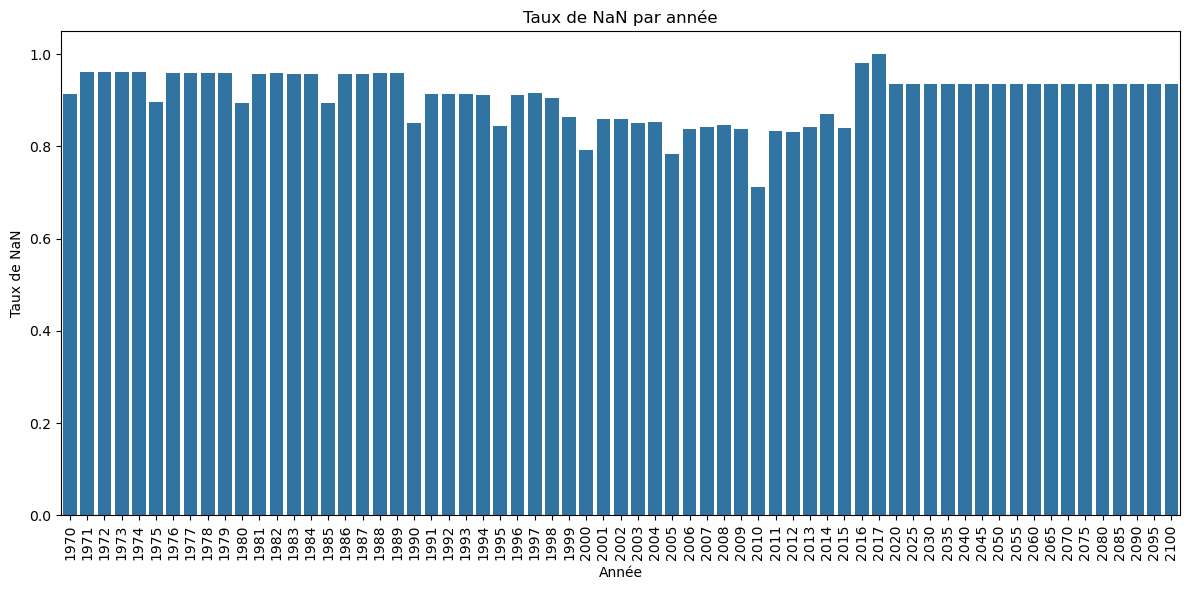

In [41]:
# Tous d'abord on va afficher le taux de NaN par année dans un graphique en batons
colonnes_annees_str = [c for c in dfs['data'].columns if c.isdigit()]
# proportion de NaN par année (sur toutes les lignes/pays-indicateurs)
data_years_nan = dfs['data'][colonnes_annees_str].isna().mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=data_years_nan, x='index', y=0, color='C0')
plt.xticks(rotation=90)
plt.title("Taux de NaN par année")
plt.xlabel("Année")
plt.ylabel("Taux de NaN")
plt.tight_layout()
plt.show()

# Choix d'années retenues (à ajuster si nécessaire)
annees_a_garder = ['2010', '2011', '2012', '2013', '2014', '2015']

In [42]:
# Ici on va supprimer les sous indicateurs donc les indicateurs qui contiennent 4 points "." dans leur code
print("Avant :", len(dfs['series']))
dfs['series'] = dfs['series'][~dfs['series']['Series Code'].str.contains(r'\..*\..*\..*\.')]
print("Après :", len(dfs['series']))

Avant : 3665
Après : 1268


In [43]:
# Ici on va supprimer les indicateurs qui ont plus de 80% de NaN sur les années sélectionnées
# Correction : on calcule d'abord la proportion de NaN par indicateur sur l'ensemble des pays et années
data_tempo = dfs['data'][['Indicator Code'] + annees_a_garder].copy()
# Agréger par indicateur : proportion moyenne de NaN sur toutes les lignes (pays) et années
taux_par_indic = (
    data_tempo
    .groupby('Indicator Code')[annees_a_garder]
    .apply(lambda df: df.isna().mean().mean())
)
# garder les indicateurs avec <=20% de NaN
indicateurs_a_garder = taux_par_indic[taux_par_indic <= 0.2].index
print(f"Indicateurs avant filtre : {len(dfs['series'])}")
dfs['series'] = dfs['series'][dfs['series']['Series Code'].isin(indicateurs_a_garder)]
print(f"Indicateurs après filtre : {len(dfs['series'])}")

Indicateurs avant filtre : 1268
Indicateurs après filtre : 29


In [ ]:
# Ici on va garder uniquement les indicateurs en rapport avec l'éducation
import re
education_keywords = [
    # Général
    "education", "school", "student", "pupil", "teacher", "class", "classroom",
    
    # Scolarisation / niveaux
    "enrollment", "attainment", "completion", "dropout", "literacy", "illiteracy",
    "primary", "secondary", "tertiary", "higher", "pre-primary", "post-secondary",

    # Compétences & formation
    "training", "vocational", "learning", "knowledge", "skills", "academic",

    # Infrastructure & accès
    "infrastructure", "facility", "university", "college",

    # Numérique / internet
    "internet", "digital", "ict", "technology", "e-learning", "online"
]

print ("Avant filtre éducation :", len(dfs['series']))

# Utiliser les bornes de mots et échapper les motifs (corrigé : utiliser \b correctement)
pattern = r"\b(?:" + "|".join([re.escape(k) for k in education_keywords]) + r")\b"
mask_name = dfs['series']['Indicator Name'].str.contains(pattern, case=False, na=False)

# Si la colonne Topic existe, l'utiliser comme complément plus fiable
mask_topic = False
if 'Topic' in dfs['series'].columns:
    mask_topic = dfs['series']['Topic'].str.contains(r'education|school|training|literacy', case=False, na=False)

mask_education = mask_name | mask_topic

# Appliquer le filtre
dfs['series'] = dfs['series'][mask_education]
print("Après filtre éducation :", len(dfs['series']))

Avant filtre éducation : 29
Après filtre éducation : 16


In [45]:
# Ici on va enlever les indicateurs qui sont genrés
mask_gender = dfs['series']['Indicator Name'].str.contains(r'\b(male|female|men|women|boy|girl|sex|gender)\b', case=False, na=False)
dfs['series'] = dfs['series'][~mask_gender]

/var/folders/3m/lmpnhrkx07v6nnn5lbwvr9gw0000gn/T/ipykernel_61594/4282404965.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask_gender = dfs['series']['Indicator Name'].str.contains(r'\b(male|female|men|women|boy|girl|sex|gender)\b', case=False, na=False)


In [46]:
#Maintenant on passe au pays, on va supprimer les pays qui n'ont pas ou peu (50%) de données sur les années sélectionnées
# Correction : agrégation par pays sur toutes les séries/indicateurs
data_tempo = dfs['data'][['Country Name'] + annees_a_garder].copy()
# Calcul de la proportion moyenne de NaN par pays (sur toutes les lignes correspondant au pays)
taux_par_pays = (
    data_tempo
    .groupby('Country Name')[annees_a_garder]
    .apply(lambda df: df.isna().mean().mean())
)
# On garde les pays avec au moins 50% de données renseignées (<=0.5 de NaN)
pays_a_garder = taux_par_pays[taux_par_pays <= 0.5].index
print("Avant :", len(dfs['country']))
dfs['country'] = dfs['country'][dfs['country']['Table Name'].isin(pays_a_garder)]
print("Après :", len(dfs['country']))

Avant : 216
Après : 0


In [47]:
colonnes_annees = annees_a_garder

# 2. Filtrer les données selon nos critères (pays valides, indicateurs éducatifs filtrés)
codes_pays_valides = dfs['country']['Country Code'].unique()
codes_indic_valides = dfs['series']['Series Code'].unique()

# 3. Filtrer le dataframe data selon nos critères
data_filtre = dfs['data'][
    (dfs['data']['Country Code'].isin(codes_pays_valides)) &
    (dfs['data']['Indicator Code'].isin(codes_indic_valides))
].copy()

print(f"Données filtrées : {data_filtre.shape[0]} lignes")

# 4. Transformation en format long avec uniquement les années sélectionnées
df_long = data_filtre.melt(
    id_vars=['Country Code','Country Name','Indicator Code','Indicator Name'],
    value_vars=colonnes_annees,
    var_name='Année',
    value_name='Valeur'
).dropna(subset=['Valeur'])

print(f"Format long : {df_long.shape[0]} lignes après suppression des NaN")

# 5. Analyse de la richesse des données par indicateur et par année
df_indic_annee = (
    df_long
    .groupby(['Indicator Code','Indicator Name','Année'])['Country Code']
    .nunique()
    .reset_index(name='nb_pays')
)

df_sorted = df_indic_annee.sort_values('nb_pays', ascending=False)
print("\nTop 20 indicateurs par année avec le plus de pays :")
print(df_sorted.head(20))

# 6. Analyse de la richesse moyenne des indicateurs sur la période
indic_richesse = (
    df_indic_annee
    .groupby(['Indicator Code','Indicator Name'])['nb_pays']
    .mean()
    .reset_index(name='nb_pays_moyen')
    .sort_values('nb_pays_moyen', ascending=False)
)

print("\nTop 20 indicateurs avec le plus de pays en moyenne :")
print(indic_richesse.head(20))

Données filtrées : 0 lignes
Format long : 0 lignes après suppression des NaN

Top 20 indicateurs par année avec le plus de pays :
Empty DataFrame
Columns: [Indicator Code, Indicator Name, Année, nb_pays]
Index: []

Top 20 indicateurs avec le plus de pays en moyenne :
Empty DataFrame
Columns: [Indicator Code, Indicator Name, nb_pays_moyen]
Index: []


S’il y a des valeurs d’indicateur pour des années futures, ce ne sont pas des données observées mais des estimations ou projections.

Pour l'analyse historique des systèmes éducatifs, nous ne gardons que les années passées.

## Étapes 3. Consolidez vos résultats dans un dataframe (pays, indicateurs)

In [48]:
# Ici on va filtrer le data frame data pour ne garder que les indicateurs, pays et années pertinents
# puis construire un DataFrame pivot (pays x indicateurs) avec la moyenne sur la période.

# Recalculer / confirmer les variables de périmètre utilisées précédemment
colonnes_annees = annees_a_garder  # liste d'années définie plus haut
codes_pays_valides = dfs['country']['Country Code'].unique()
codes_indic_valides = dfs['series']['Series Code'].unique()

# Filtrer la table brute
data_filtre = dfs['data'][
    (dfs['data']['Country Code'].isin(codes_pays_valides)) &
    (dfs['data']['Indicator Code'].isin(codes_indic_valides))
].copy()

# Ne garder que les colonnes d'années retenues et transformer en format long
df_long = data_filtre.melt(
    id_vars=['Country Code', 'Country Name', 'Indicator Code', 'Indicator Name'],
    value_vars=colonnes_annees,
    var_name='Année',
    value_name='Valeur'
).dropna(subset=['Valeur'])

# Agréger par pays et indicateur : moyenne sur les années sélectionnées
# Index : Country Name (nom lisible pour affichage), colonnes : Indicator Name
df_pays_indic = (
    df_long
    .groupby(['Country Name', 'Indicator Name'])['Valeur']
    .mean()
    .unstack(level='Indicator Name')
)

# Petite vérification
print('df_pays_indic shape :', df_pays_indic.shape)
print(df_pays_indic.iloc[:5, :5])


df_pays_indic shape : (0, 0)
Empty DataFrame
Columns: []
Index: []


In [49]:
# CORRECTION : On utilise maintenant les données filtrées de l'étape 2 (data_filtre)
# au lieu des données brutes (dfs['data'])

# On garde seulement les colonnes utiles des données FILTRÉES
df = data_filtre[['Country Name', 'Indicator Name'] + annees_a_garder]

# On transforme les années en format long (1 ligne = 1 pays x 1 indicateur x 1 année)
df_long = df.melt(
    id_vars=['Country Name', 'Indicator Name'],
    value_vars=annees_a_garder,
    var_name='Année',
    value_name='Valeur'
)

# On enlève les valeurs manquantes
df_long = df_long.dropna(subset=['Valeur'])

# On calcule la moyenne de chaque indicateur pour chaque pays
df_agrege = df_long.groupby(['Country Name', 'Indicator Name'])['Valeur'].mean().reset_index()

# On transforme pour avoir 1 pays par ligne et 1 indicateur par colonne
df_final = df_agrege.pivot(index='Country Name', columns='Indicator Name', values='Valeur')

# On affiche un aperçu
print("DataFrame final avec données filtrées :")
print(f"Shape: {df_final.shape}")
print("\nNombre d'indicateurs:", df_final.shape[1])
print("Nombre de pays:", df_final.shape[0])
df_final.head()

DataFrame final avec données filtrées :
Shape: (0, 0)

Nombre d'indicateurs: 0
Nombre de pays: 0


Indicator Name
Country Name


Après avoir analysé la qualité et la pertinence des données, nous avons défini un périmètre restreint :

Indicateurs : nous avons conservé uniquement ceux qui apportent une information utile à la demande de Mark (économie, population, éducation). Les autres catégories trop techniques ou hors sujet ont été écartées.

Pays : nous avons filtré les “vrais pays” en excluant les agrégats (ex. World, OECD members, Arab World), afin d’éviter les doublons ou biais liés aux regroupements.

Années : nous avons retenu uniquement les périodes avec un nombre suffisant de données disponibles, afin de maximiser la comparabilité entre pays.

Ce triple filtrage permet de travailler sur un DataFrame épuré, cohérent avec la problématique métier, et de garantir que les analyses à venir soient à la fois robustes et directement exploitables par Mark.

Nous avons d’abord filtré les années en ne conservant que celles avec au moins 20 % de données renseignées, afin d’éviter les colonnes trop vides.
Concernant les indicateurs, au lieu de prendre mécaniquement les plus remplis (head(50)), nous avons retenu 15 indicateurs jugés pertinents au regard de la demande de Mark.
Cette sélection couvre trois grands axes essentiels :

Démographie (population totale, croissance, structure par âge, espérance de vie)

Économie (PIB, revenu, PPA, dette publique)

Éducation (alphabétisation, scolarisation, durée d’éducation)

# Exercice partie 3 -----------------------------------------------------------------------------

In [50]:
df_corr = df_pays_indic.copy()

df_corr = df_corr.fillna(df_corr.mean())

In [51]:
corr_pearson = df_corr.corr(method='pearson')

corr_spearman = df_corr.corr(method='spearman')

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_pearson, annot=False, cmap="coolwarm", center=0)
plt.title("Corrélation de Pearson entre indicateurs")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(corr_spearman, annot=False, cmap="coolwarm", center=0)
plt.title("Corrélation de Spearman entre indicateurs")
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>

Les matrices de corrélation montrent que plusieurs indicateurs sont fortement liés entre eux.

Les indicateurs économiques (PIB, RNB, PPA) présentent une corrélation très forte, ce qui confirme qu’ils mesurent des aspects proches de la richesse.

Les taux de scolarisation (primaire, secondaire, tertiaire) sont également fortement corrélés, reflétant une même dynamique éducative.

À l’inverse, la croissance démographique et la part des jeunes (0–14 ans) sont négativement corrélées au PIB par habitant, illustrant le contraste entre pays riches et pays en développement.

Certains indicateurs, comme la durée théorique du primaire, apparaissent indépendants et donc moins déterminants.

Cela confirme que nous pouvons réduire le nombre d’indicateurs en gardant uniquement quelques-uns représentatifs, tout en conservant les dimensions essentielles (économie, démographie, éducation).

In [ ]:
seuil = 0.7

# Construire la matrice absolue de corrélation
corr_abs = corr_pearson.abs()

# Utiliser uniquement la partie supérieure triangulaire pour éviter doublons
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))

# Stratégie déterministe : conserver d'abord les variables les moins corrélées (moyenne de corr) et
# n'ajouter une variable que si elle n'est pas fortement corrélée (>seuil) avec une variable déjà conservée.
mean_corr = corr_abs.mean().sort_values()  # variables les moins corrélées en premier
keepers = []
for col in mean_corr.index:
    if not any((corr_abs.loc[col, k] > seuil) for k in keepers):
        keepers.append(col)

# Les paires corrélées fortes seront visibles via 'upper'
corr_fortes = upper.stack().sort_values(ascending=False)
corr_fortes = corr_fortes[corr_fortes > seuil]
print("Paires d'indicateurs corrélés > {} :".format(seuil))
print(corr_fortes.head(20))

Paires d'indicateurs corrélés > 0.7 :
Indicator Name                                                                               Indicator Name                                                                             
Survival rate to the last grade of primary education, both sexes (%)                         Cumulative drop-out rate to the last grade of primary education, both sexes (%)               1.00
Cumulative drop-out rate to the last grade of primary education, both sexes (%)              Survival rate to the last grade of primary education, both sexes (%)                          1.00
Adjusted net enrolment rate, primary, both sexes (%)                                         Rate of out-of-school children of primary school age, both sexes (%)                          1.00
Rate of out-of-school children of primary school age, both sexes (%)                         Adjusted net enrolment rate, primary, both sexes (%)                                          1.00
Enrolment

In [ ]:
# On supprime les variables non conservées selon la stratégie ci-dessus
print("Shape avant suppression :", df_corr.shape)
cols_to_drop = [c for c in df_corr.columns if c not in keepers]
df_corr_reduit = df_corr.drop(columns=cols_to_drop)
print("Shape après suppression :", df_corr_reduit.shape)

Shape avant suppression : (207, 253)
Shape après suppression : (207, 71)



--- Duration of compulsory education (years) ---
count   207.00
mean      9.58
std       2.06
min       5.00
25%       9.00
50%       9.58
75%      10.83
max      15.00
Name: Duration of compulsory education (years), dtype: float64


<Figure size 800x500 with 0 Axes>

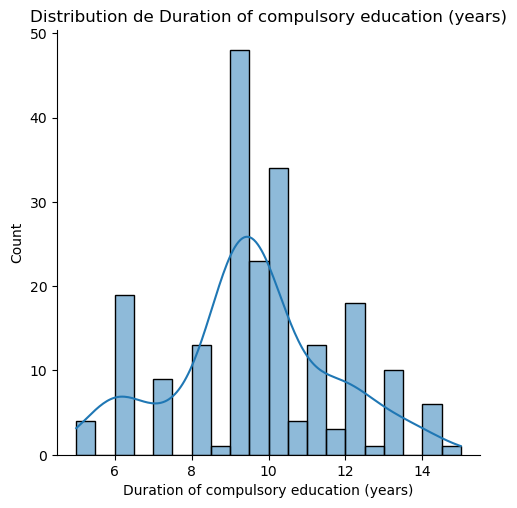


--- Early school leavers from primary education, both sexes (number) ---
count       207.00
mean     120692.27
std      263340.73
min          11.53
25%        2347.77
50%       55178.12
75%      120692.27
max     2320979.75
Name: Early school leavers from primary education, both sexes (number), dtype: float64


<Figure size 800x500 with 0 Axes>

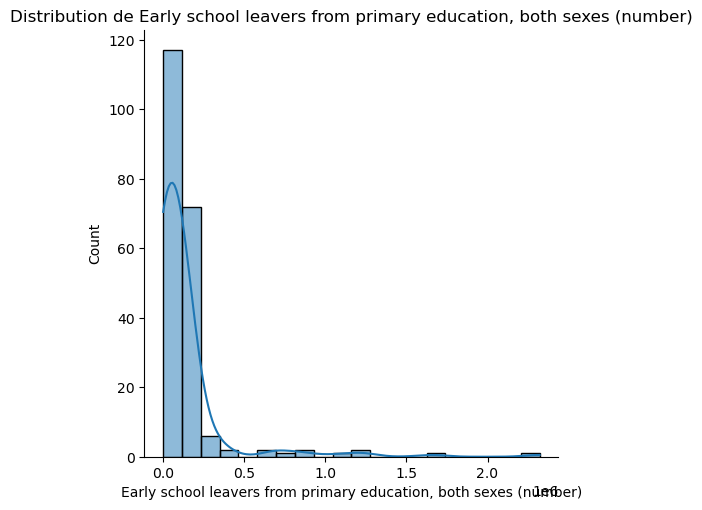


--- Enrolment in Grade 6 of primary education, both sexes (number) ---
count       207.00
mean     317605.35
std      552342.86
min         207.00
25%       38682.12
50%      311504.50
75%      317605.35
max     4710281.60
Name: Enrolment in Grade 6 of primary education, both sexes (number), dtype: float64


<Figure size 800x500 with 0 Axes>

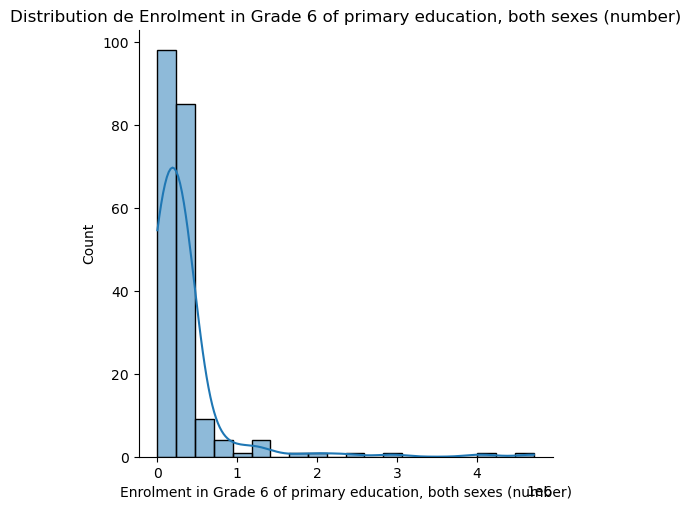


--- Enrolment in Grade 7 of primary education, both sexes (number) ---
count      207.00
mean    157814.02
std      93740.63
min          8.00
25%     157814.02
50%     157814.02
75%     157814.02
max     922395.20
Name: Enrolment in Grade 7 of primary education, both sexes (number), dtype: float64


<Figure size 800x500 with 0 Axes>

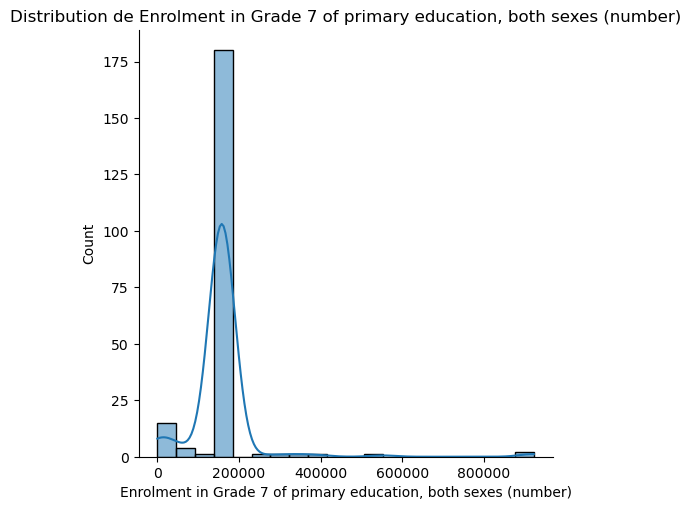


--- Enrolment in early childhood educational development programmes, both sexes (number) ---
count       207.00
mean     232925.93
std      298484.17
min         233.00
25%      232925.93
50%      232925.93
75%      232925.93
max     3296539.50
Name: Enrolment in early childhood educational development programmes, both sexes (number), dtype: float64


<Figure size 800x500 with 0 Axes>

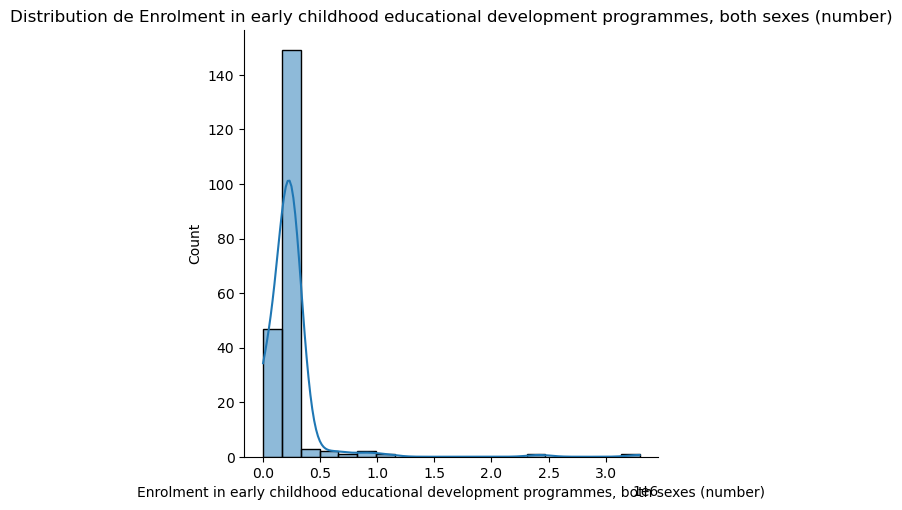


--- Enrolment in lower secondary vocational, both sexes (number) ---
count       207.00
mean      58202.09
std      116504.37
min          64.33
25%       21597.50
50%       58202.09
75%       58202.09
max     1611330.20
Name: Enrolment in lower secondary vocational, both sexes (number), dtype: float64


<Figure size 800x500 with 0 Axes>

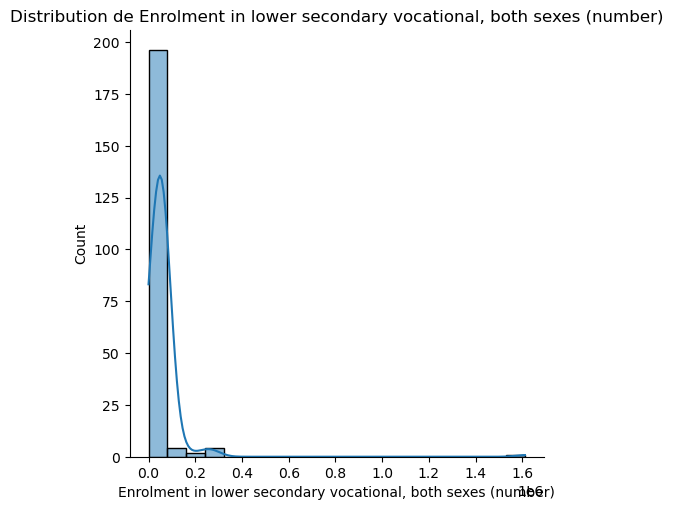


--- Enrolment in post-secondary non-tertiary education, both sexes (number) ---
count       207.00
mean      84510.30
std      162322.34
min          18.00
25%        8419.60
50%       84510.30
75%       84510.30
max     1564102.00
Name: Enrolment in post-secondary non-tertiary education, both sexes (number), dtype: float64


<Figure size 800x500 with 0 Axes>

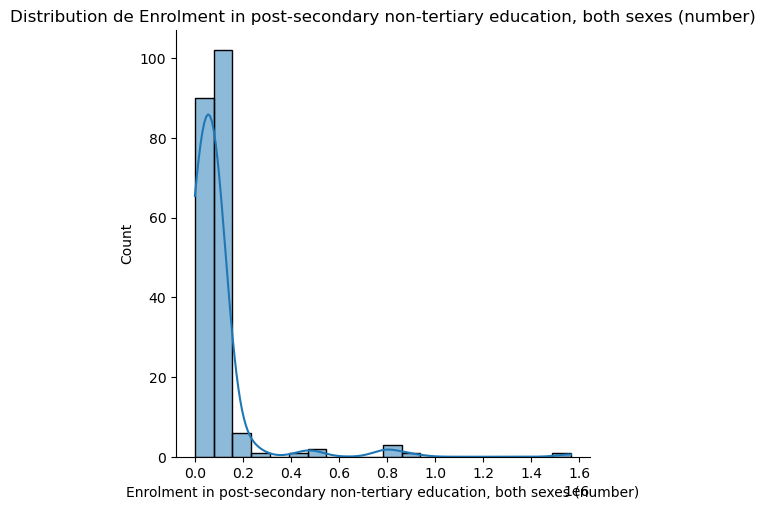


--- Enrolment in post-secondary non-tertiary education, private institutions, both sexes (number) ---
count      207.00
mean     45394.58
std      69936.56
min          9.00
25%      14276.87
50%      45394.58
75%      45394.58
max     662459.00
Name: Enrolment in post-secondary non-tertiary education, private institutions, both sexes (number), dtype: float64


<Figure size 800x500 with 0 Axes>

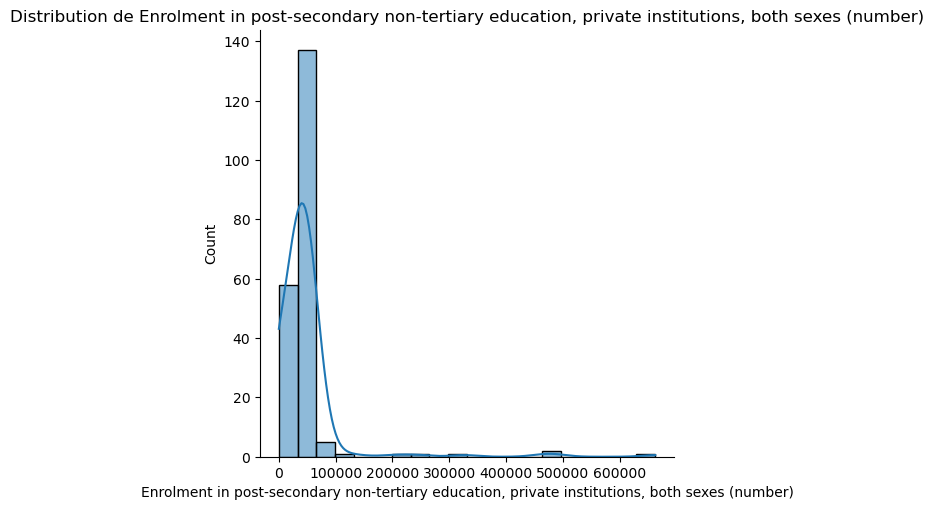


--- Enrolment in primary education, private institutions, both sexes (number) ---
count       207.00
mean     366412.70
std      926118.81
min          76.50
25%       10166.03
50%       77220.00
75%      366412.70
max     7735078.00
Name: Enrolment in primary education, private institutions, both sexes (number), dtype: float64


<Figure size 800x500 with 0 Axes>

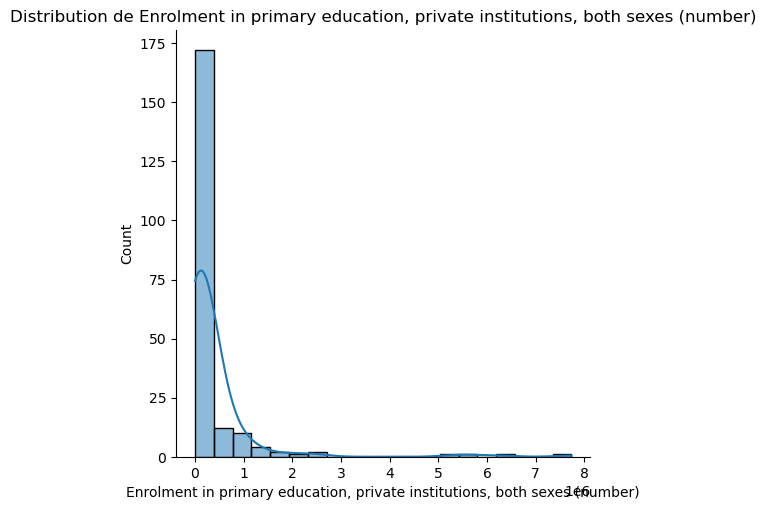


--- Expenditure on education not allocated by level as % of government expenditure on education (%) ---
count   207.00
mean      7.31
std       4.58
min       0.02
25%       7.25
50%       7.31
75%       7.31
max      35.65
Name: Expenditure on education not allocated by level as % of government expenditure on education (%), dtype: float64


<Figure size 800x500 with 0 Axes>

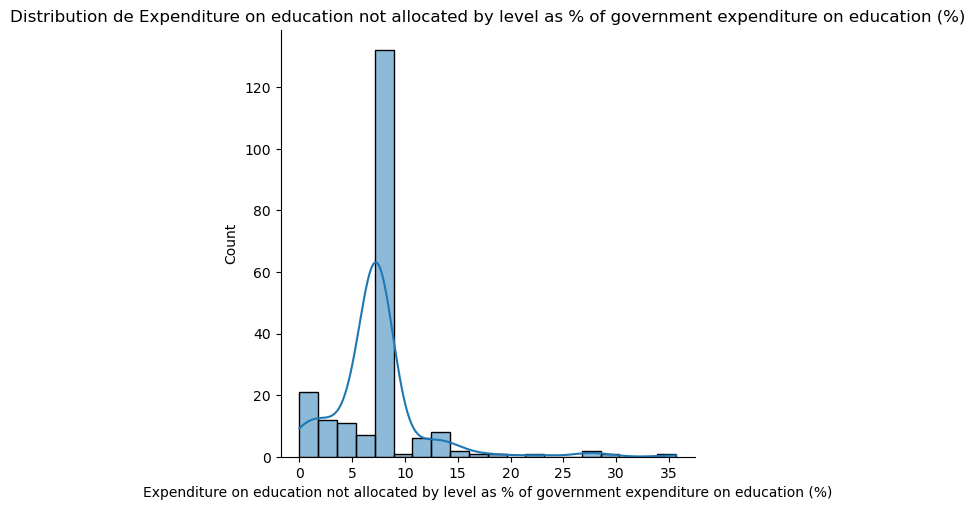


--- Expenditure on lower secondary as % of government expenditure on education (%) ---
count   207.00
mean     19.12
std       3.86
min       9.22
25%      18.93
50%      19.12
75%      19.12
max      38.48
Name: Expenditure on lower secondary as % of government expenditure on education (%), dtype: float64


<Figure size 800x500 with 0 Axes>

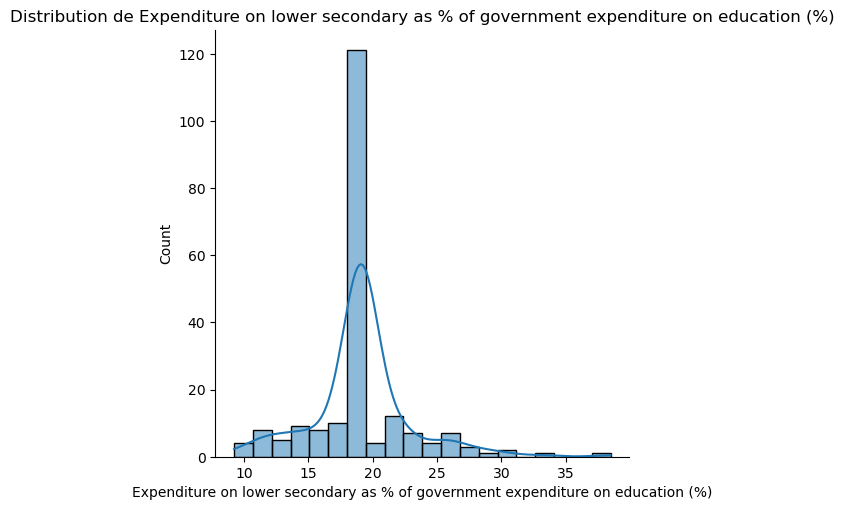


--- Expenditure on primary as % of government expenditure on education (%) ---
count   207.00
mean     34.39
std       9.74
min       0.00
25%      29.72
50%      34.39
75%      36.34
max      66.99
Name: Expenditure on primary as % of government expenditure on education (%), dtype: float64


<Figure size 800x500 with 0 Axes>

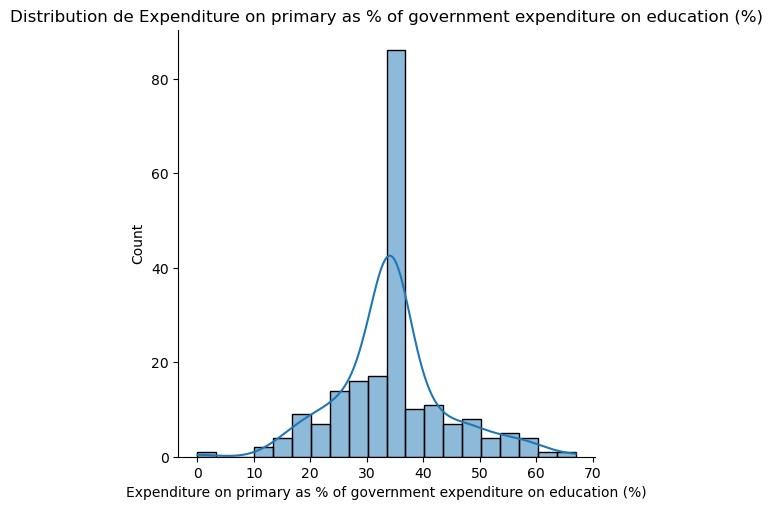


--- Expenditure on primary as % of total government expenditure (%) ---
count   207.00
mean      5.35
std       2.11
min       0.91
25%       4.15
50%       5.35
75%       5.49
max      12.17
Name: Expenditure on primary as % of total government expenditure (%), dtype: float64


<Figure size 800x500 with 0 Axes>

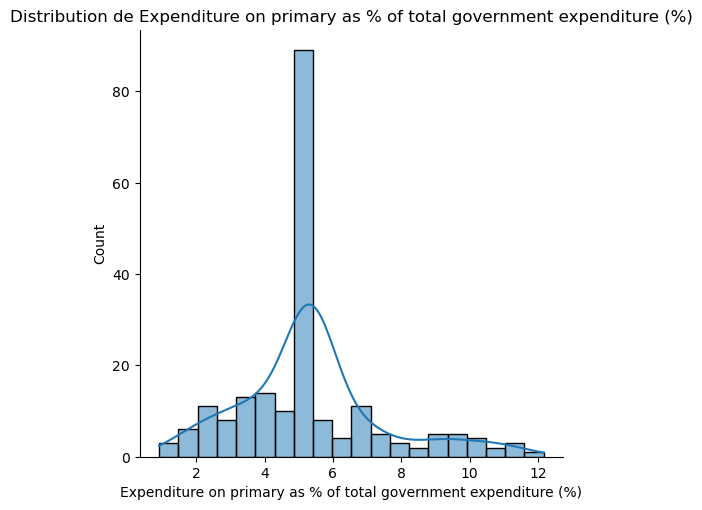


--- Expenditure on secondary and post-secondary non-tertiary vocational as % of government expenditure on education (%) ---
count   207.00
mean      7.14
std       2.48
min       0.01
25%       7.14
50%       7.14
75%       7.14
max      21.27
Name: Expenditure on secondary and post-secondary non-tertiary vocational as % of government expenditure on education (%), dtype: float64


<Figure size 800x500 with 0 Axes>

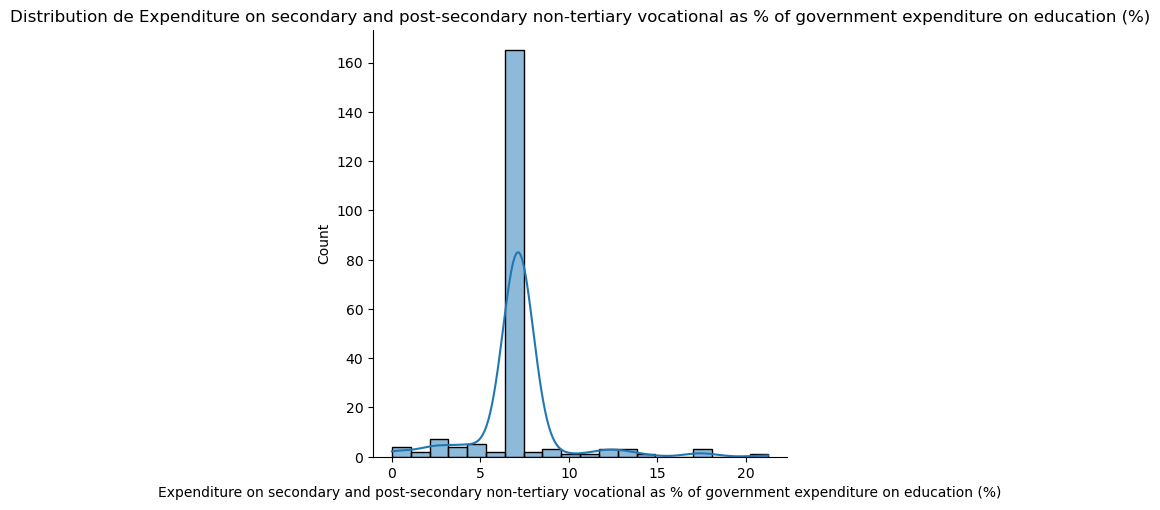


--- Expenditure on secondary as % of government expenditure on education (%) ---
count   207.00
mean     33.85
std       7.86
min      11.44
25%      30.81
50%      33.85
75%      37.67
max      65.76
Name: Expenditure on secondary as % of government expenditure on education (%), dtype: float64


<Figure size 800x500 with 0 Axes>

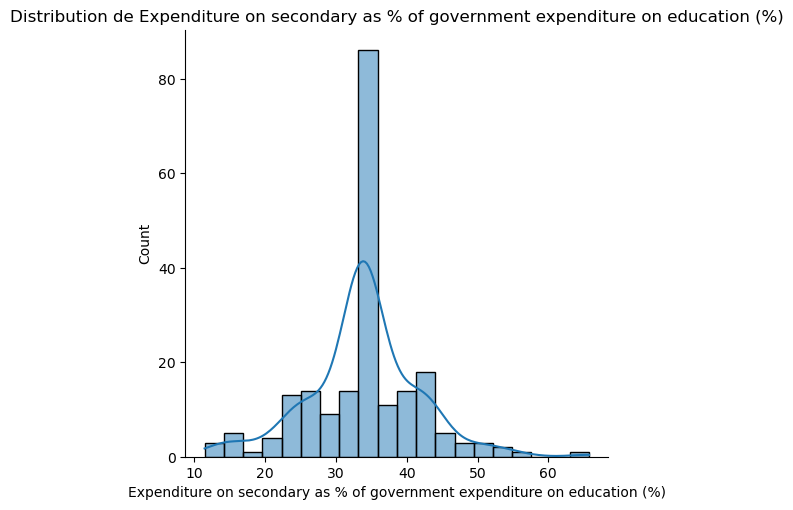


--- Expenditure on tertiary as % of government expenditure on education (%) ---
count   207.00
mean     20.45
std       7.20
min       0.00
25%      17.09
50%      20.45
75%      22.90
max      52.75
Name: Expenditure on tertiary as % of government expenditure on education (%), dtype: float64


<Figure size 800x500 with 0 Axes>

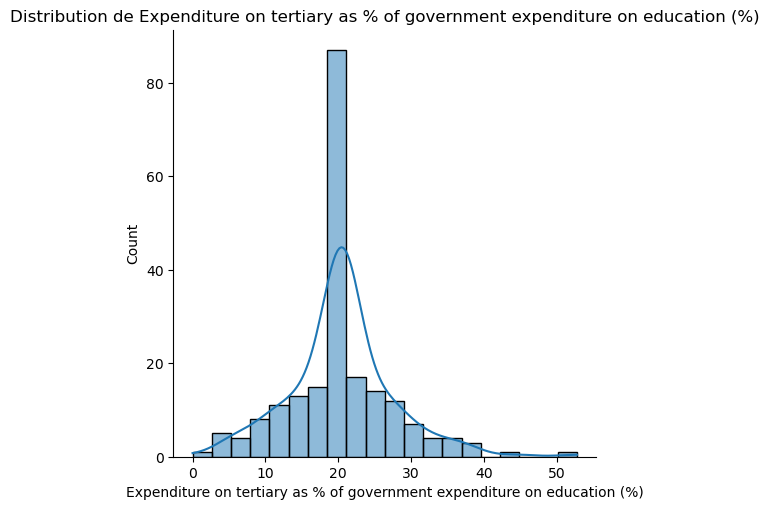


--- Expenditure on upper secondary as % of government expenditure on education (%) ---
count   207.00
mean     16.15
std       4.52
min       1.58
25%      16.15
50%      16.15
75%      16.15
max      35.58
Name: Expenditure on upper secondary as % of government expenditure on education (%), dtype: float64


<Figure size 800x500 with 0 Axes>

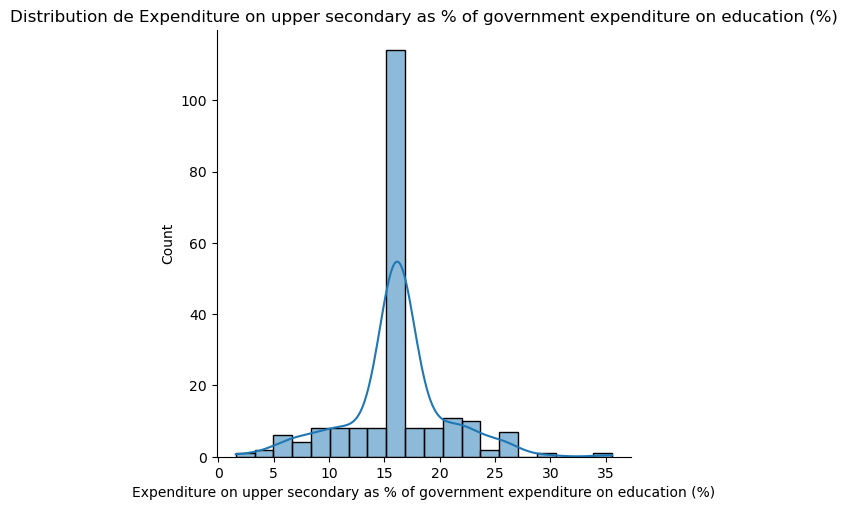


--- Expenditure on upper secondary as % of total government expenditure (%) ---
count   207.00
mean      2.35
std       0.81
min       0.33
25%       2.19
50%       2.35
75%       2.35
max       6.89
Name: Expenditure on upper secondary as % of total government expenditure (%), dtype: float64


<Figure size 800x500 with 0 Axes>

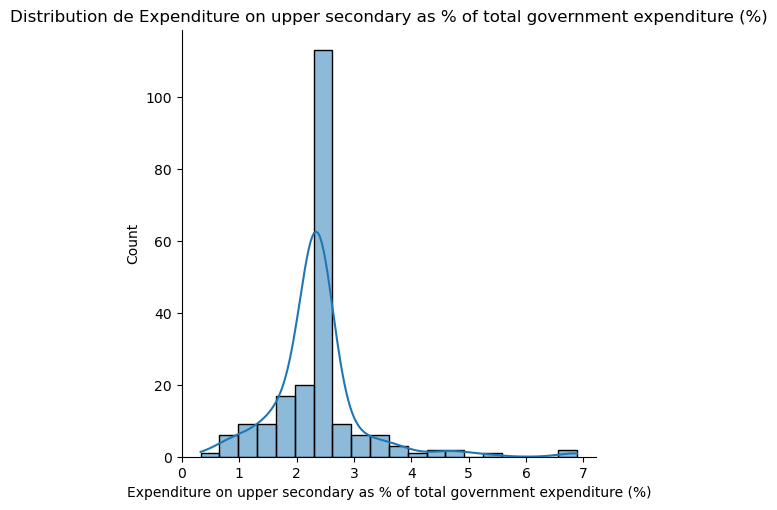


--- Government expenditure on primary education as % of GDP (%) ---
count   207.00
mean      1.59
std       0.61
min       0.18
25%       1.32
50%       1.59
75%       1.65
max       4.97
Name: Government expenditure on primary education as % of GDP (%), dtype: float64


<Figure size 800x500 with 0 Axes>

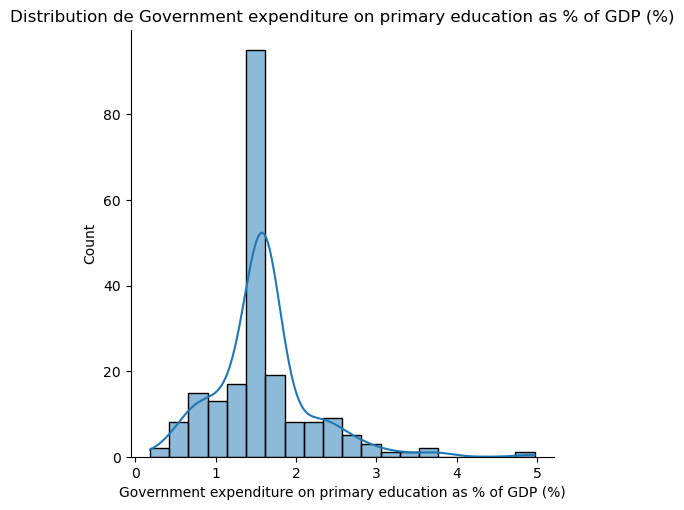


--- Government expenditure on secondary education as % of GDP (%) ---
count   207.00
mean      1.59
std       0.62
min       0.10
25%       1.35
50%       1.59
75%       1.81
max       3.82
Name: Government expenditure on secondary education as % of GDP (%), dtype: float64


<Figure size 800x500 with 0 Axes>

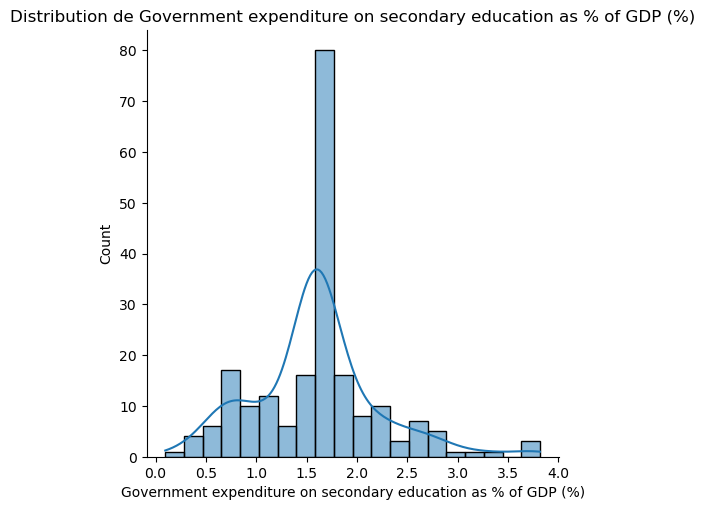


--- Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, both sexes (%) ---
count   207.00
mean     26.76
std      13.40
min       0.18
25%      23.24
50%      26.76
75%      28.53
max      67.71
Name: Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

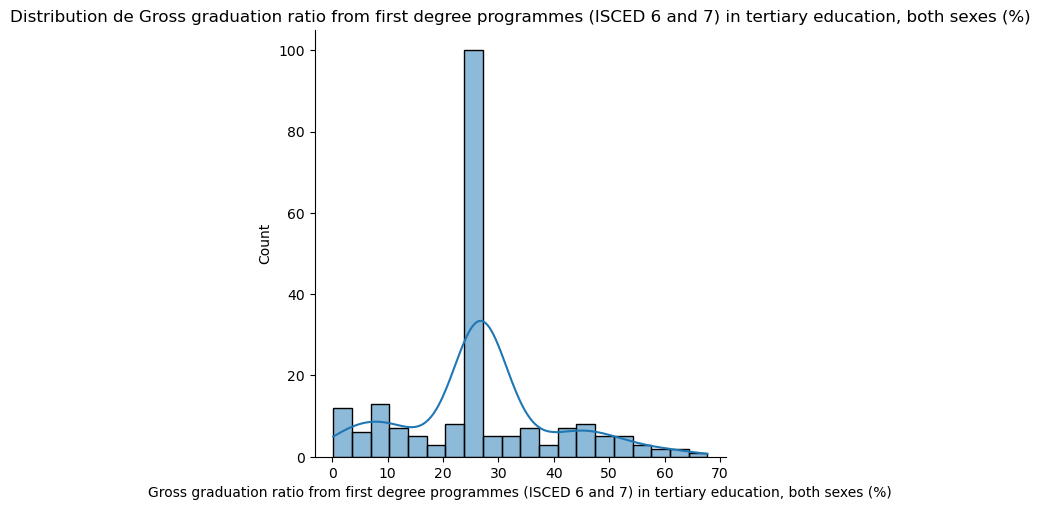


--- Labor force with advanced education (% of total) ---
count   207.00
mean     77.75
std       4.89
min      50.02
25%      77.75
50%      77.75
75%      77.75
max      93.95
Name: Labor force with advanced education (% of total), dtype: float64


<Figure size 800x500 with 0 Axes>

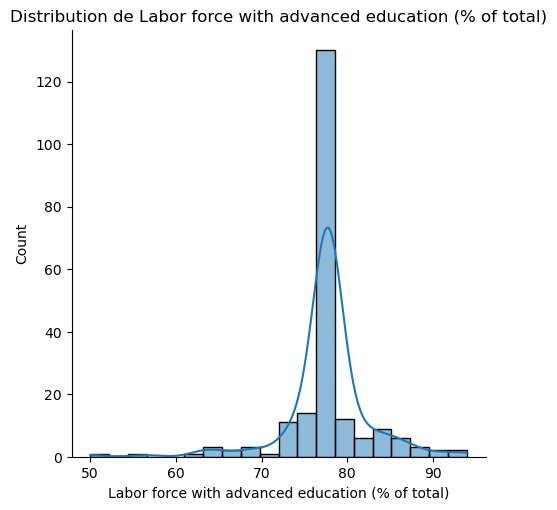


--- Labor force with basic education (% of total) ---
count   207.00
mean     48.05
std      11.98
min      14.86
25%      48.05
50%      48.05
75%      48.05
max      92.83
Name: Labor force with basic education (% of total), dtype: float64


<Figure size 800x500 with 0 Axes>

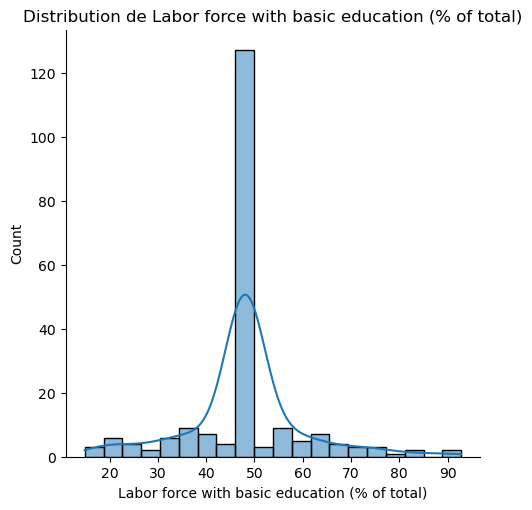


--- Labor force with intermediate education (% of total) ---
count   207.00
mean     65.59
std       6.27
min      34.44
25%      65.59
50%      65.59
75%      65.59
max      86.26
Name: Labor force with intermediate education (% of total), dtype: float64


<Figure size 800x500 with 0 Axes>

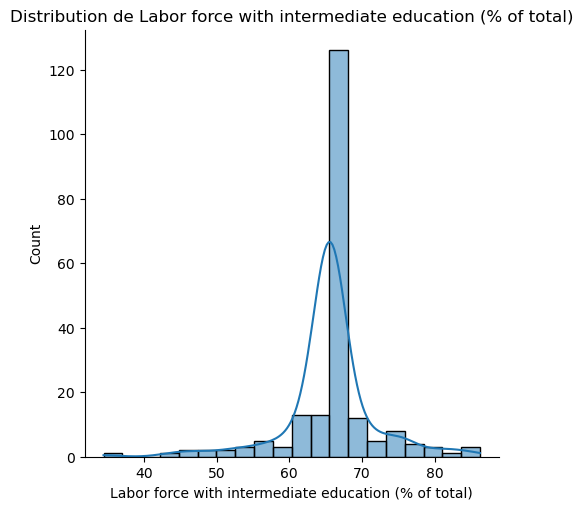


--- Net intake rate to Grade 1 of primary education, both sexes (%) ---
count   207.00
mean     69.68
std      16.39
min       7.17
25%      63.15
50%      69.68
75%      79.58
max      99.25
Name: Net intake rate to Grade 1 of primary education, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

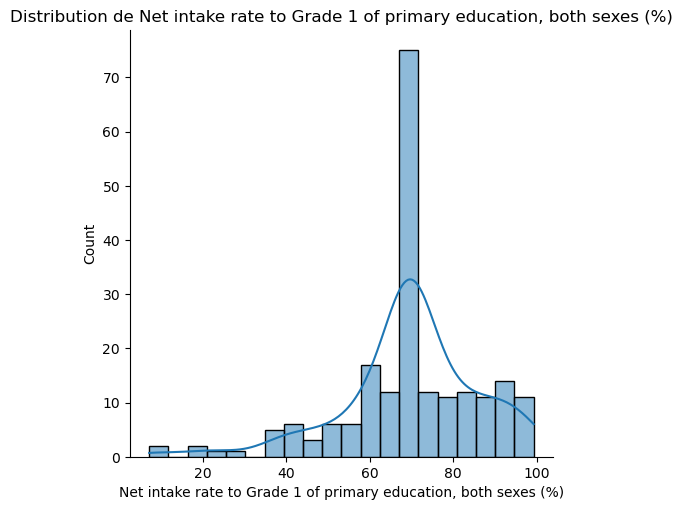


--- Official entrance age to primary education (years) ---
count   207.00
mean      6.06
std       0.53
min       5.00
25%       6.00
50%       6.00
75%       6.00
max       7.00
Name: Official entrance age to primary education (years), dtype: float64


<Figure size 800x500 with 0 Axes>

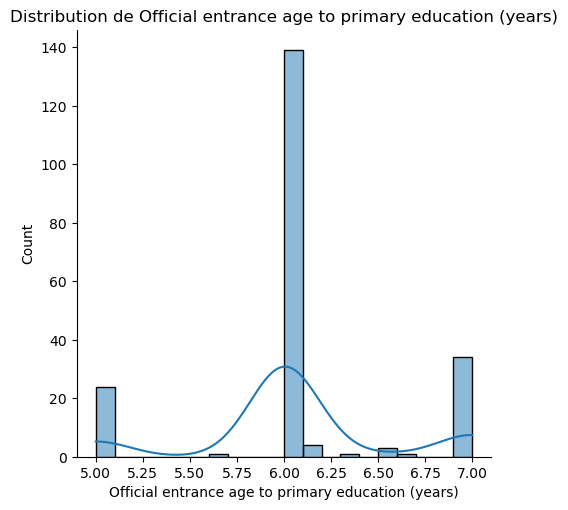


--- Out-of-school children of primary school age in pre-primary education, both sexes (number) ---
count      207.00
mean     21017.90
std      62730.01
min          1.00
25%       1519.47
50%      16821.80
75%      21017.90
max     809119.00
Name: Out-of-school children of primary school age in pre-primary education, both sexes (number), dtype: float64


<Figure size 800x500 with 0 Axes>

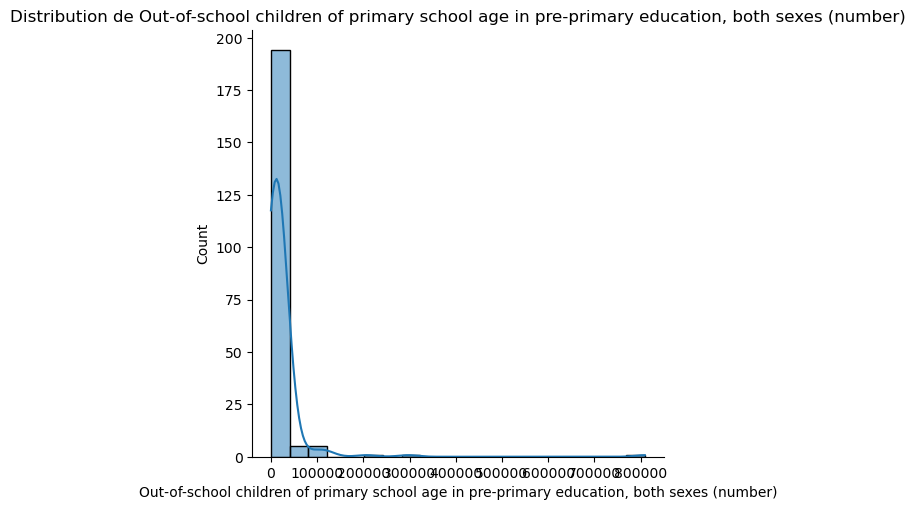


--- Out-of-school children of primary school age, both sexes (number) ---
count       207.00
mean     288712.12
std      839258.16
min          13.00
25%        5447.00
50%       54140.00
75%      288712.12
max     8735046.00
Name: Out-of-school children of primary school age, both sexes (number), dtype: float64


<Figure size 800x500 with 0 Axes>

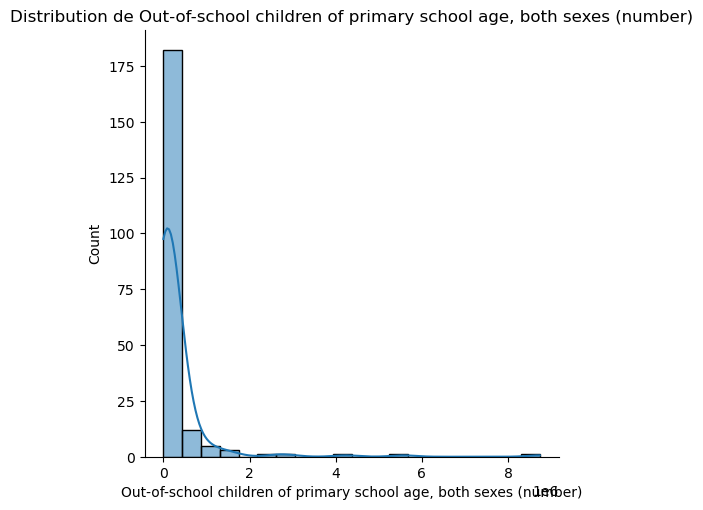


--- Over-age enrolment ratio in primary education, both sexes (%) ---
count   207.00
mean      9.92
std       6.19
min       0.00
25%       7.88
50%       9.92
75%       9.92
max      41.03
Name: Over-age enrolment ratio in primary education, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

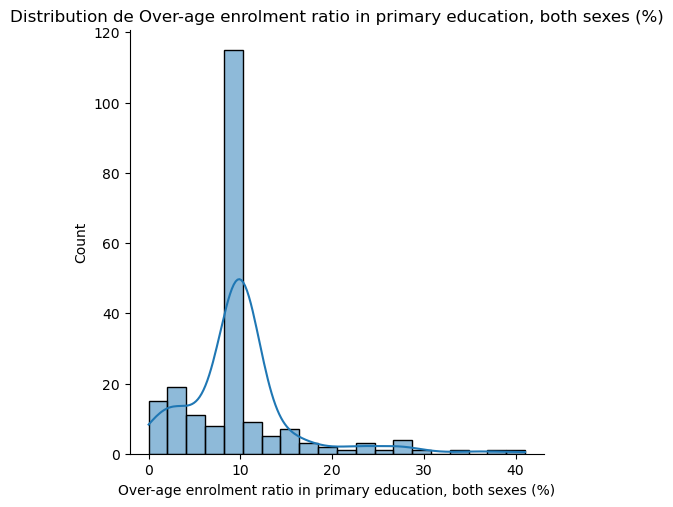


--- Percentage of all students in tertiary education enrolled in ISCED 5, both sexes (%) ---
count   207.00
mean     21.18
std      15.29
min       0.00
25%      13.28
50%      21.18
75%      21.54
max      99.33
Name: Percentage of all students in tertiary education enrolled in ISCED 5, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

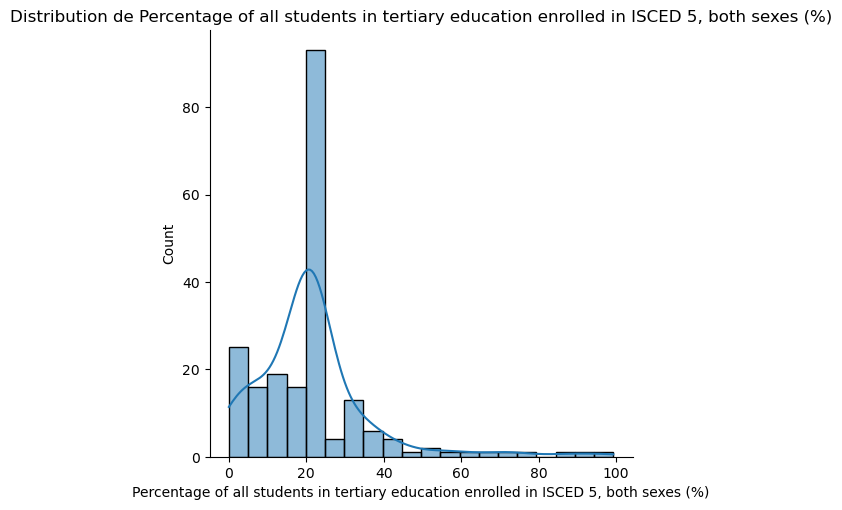


--- Percentage of all students in tertiary education enrolled in ISCED 6, both sexes (%) ---
count   207.00
mean     69.44
std      12.79
min       3.34
25%      67.64
50%      69.44
75%      72.84
max      99.03
Name: Percentage of all students in tertiary education enrolled in ISCED 6, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

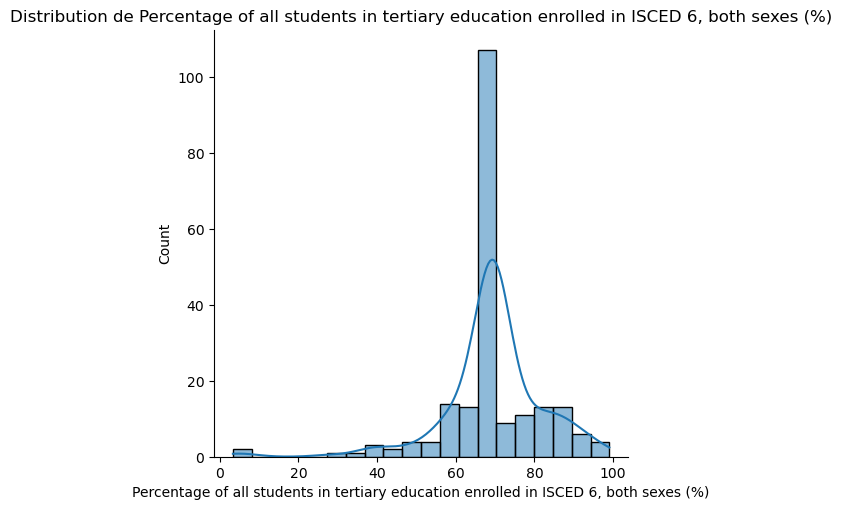


--- Percentage of all students in tertiary education enrolled in ISCED 7, both sexes (%) ---
count   207.00
mean     13.88
std       8.85
min       0.65
25%       8.70
50%      13.88
75%      13.88
max      73.32
Name: Percentage of all students in tertiary education enrolled in ISCED 7, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

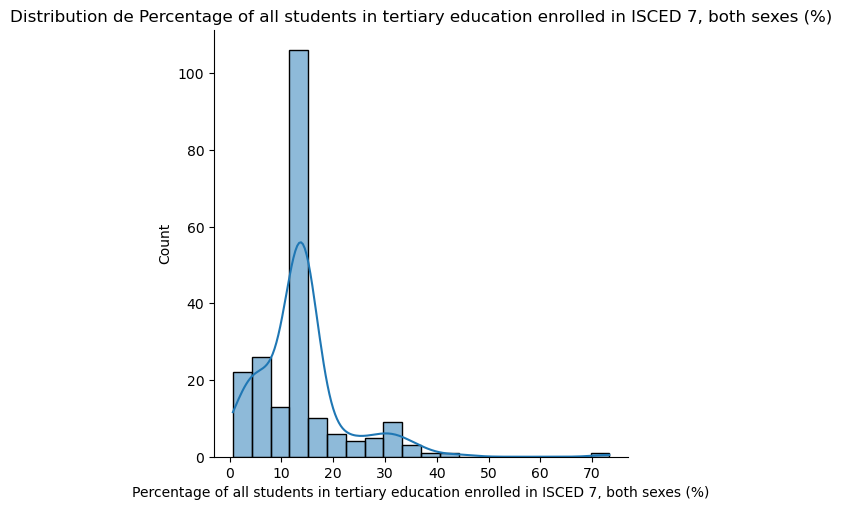


--- Percentage of all students in tertiary education enrolled in ISCED 8, both sexes (%) ---
count   207.00
mean      1.76
std       1.47
min       0.00
25%       0.82
50%       1.76
75%       1.76
max      10.33
Name: Percentage of all students in tertiary education enrolled in ISCED 8, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

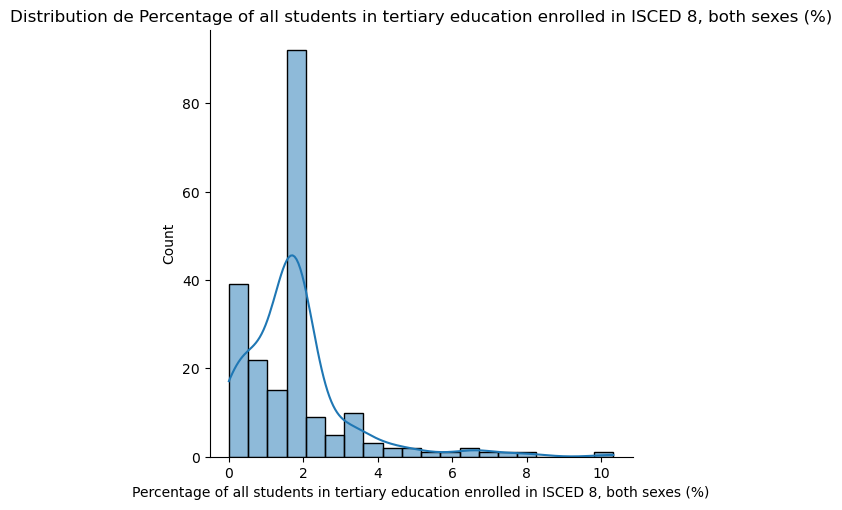


--- Percentage of enrolment in early childhood educational development programmes in private institutions (%) ---
count   207.00
mean     53.86
std      18.63
min       0.02
25%      53.86
50%      53.86
75%      53.86
max     100.00
Name: Percentage of enrolment in early childhood educational development programmes in private institutions (%), dtype: float64


<Figure size 800x500 with 0 Axes>

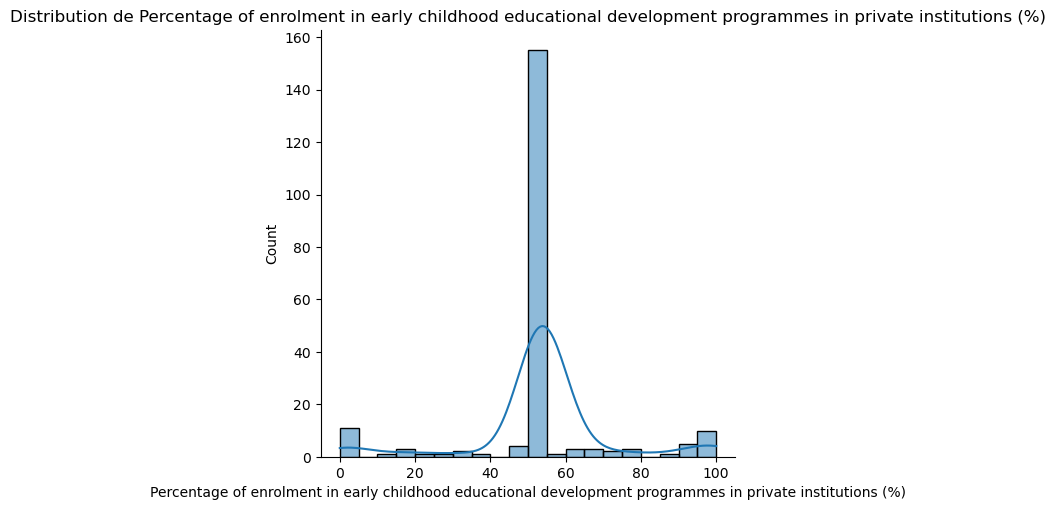


--- Percentage of enrolment in post-secondary non-tertiary education in private institutions (%) ---
count   207.00
mean     39.20
std      19.31
min       0.31
25%      39.20
50%      39.20
75%      39.20
max     100.00
Name: Percentage of enrolment in post-secondary non-tertiary education in private institutions (%), dtype: float64


<Figure size 800x500 with 0 Axes>

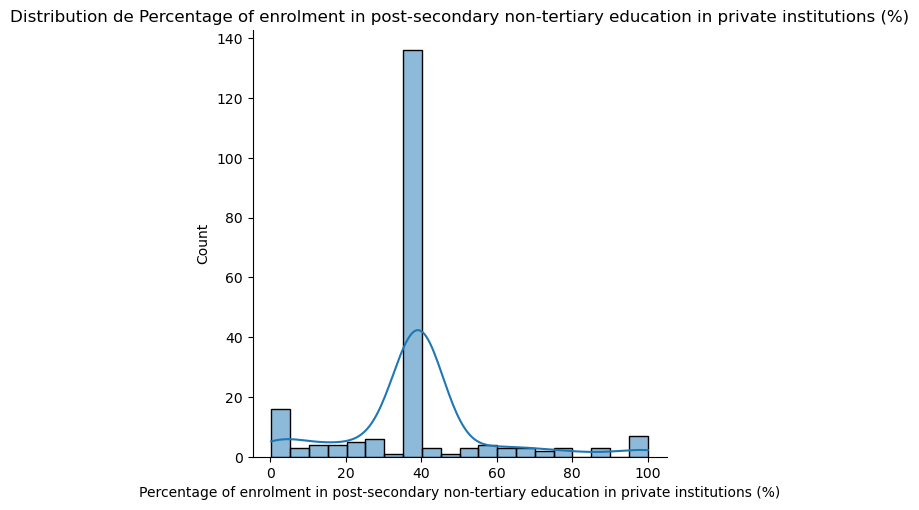


--- Percentage of enrolment in tertiary education in private institutions (%) ---
count   207.00
mean     34.89
std      22.87
min       0.00
25%      17.14
50%      34.89
75%      38.72
max     100.00
Name: Percentage of enrolment in tertiary education in private institutions (%), dtype: float64


<Figure size 800x500 with 0 Axes>

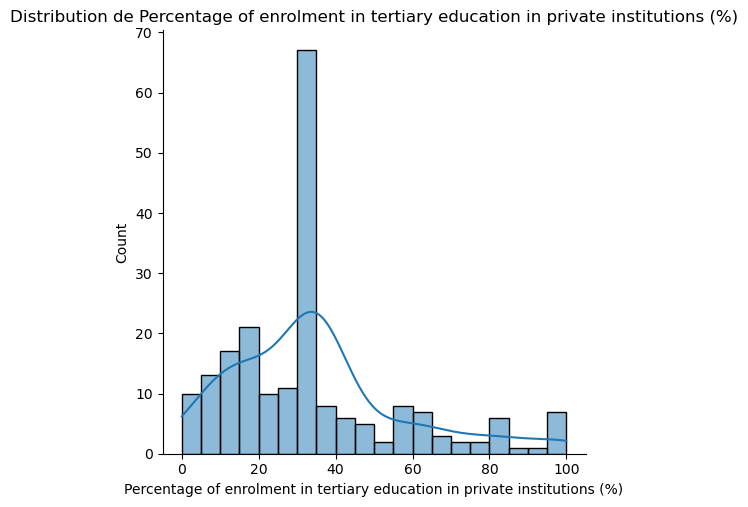


--- Percentage of new entrants to Grade 1 of primary education with early childhood educational experience, both sexes (%) ---
count   207.00
mean     67.84
std      21.50
min       1.69
25%      67.84
50%      67.84
75%      76.42
max     100.00
Name: Percentage of new entrants to Grade 1 of primary education with early childhood educational experience, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

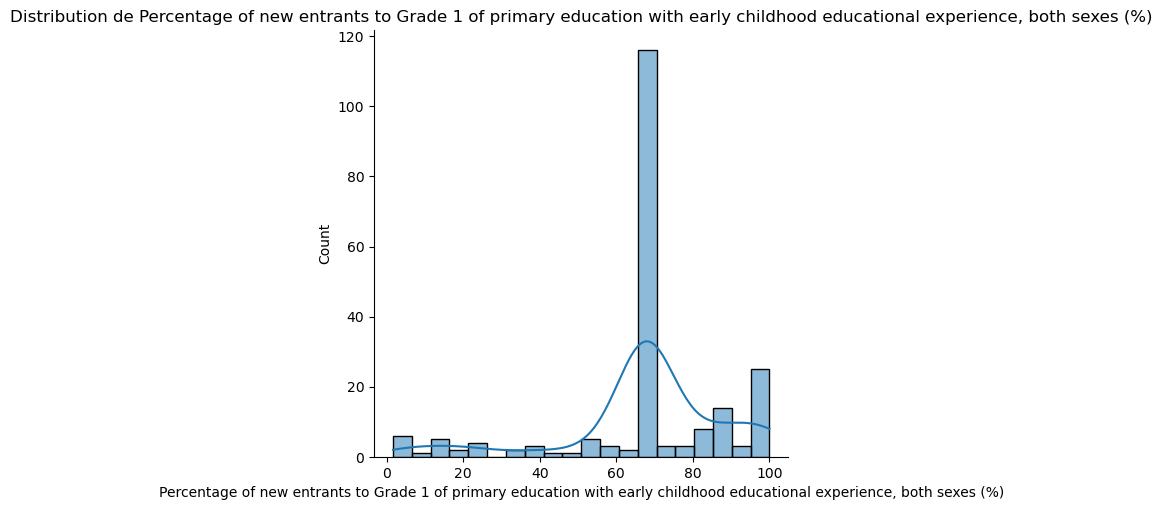


--- Percentage of repeaters in Grade 7 of primary education, both sexes (%) ---
count   207.00
mean      5.45
std       1.34
min       0.03
25%       5.45
50%       5.45
75%       5.45
max      14.15
Name: Percentage of repeaters in Grade 7 of primary education, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

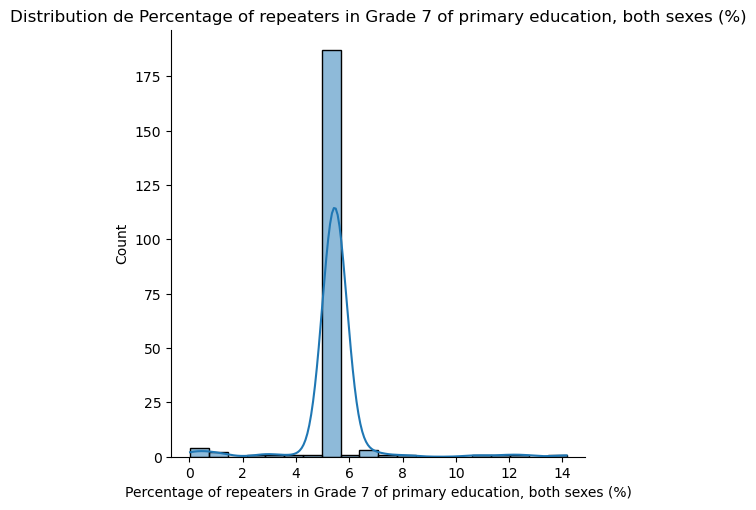


--- Percentage of students in post-secondary non-tertiary education enrolled in general programmes, both sexes (%) ---
count   207.00
mean     54.94
std      16.71
min       3.89
25%      54.94
50%      54.94
75%      54.94
max     100.00
Name: Percentage of students in post-secondary non-tertiary education enrolled in general programmes, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

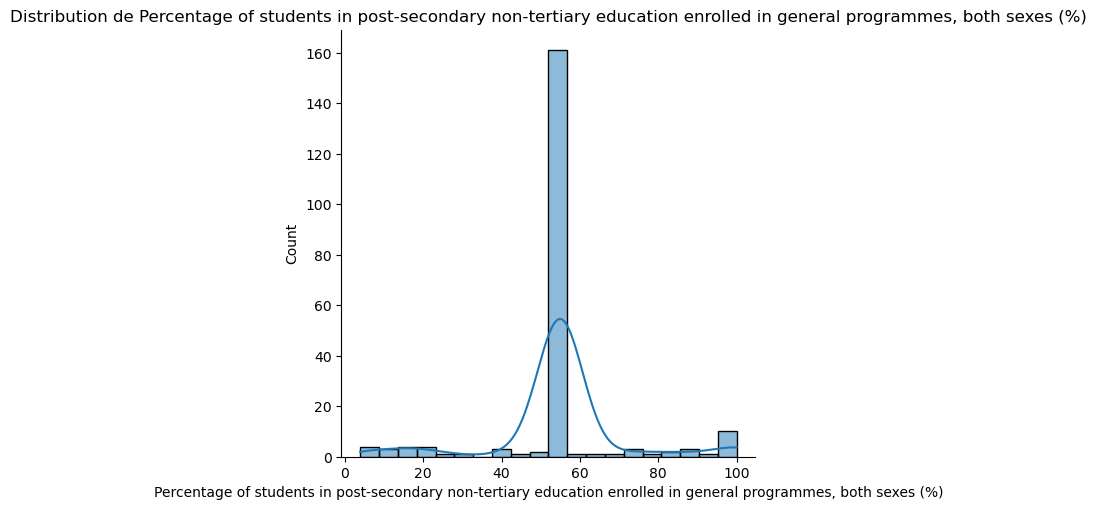


--- Percentage of students in post-secondary non-tertiary education enrolled in vocational programmes, both sexes (%) ---
count   207.00
mean     87.53
std      16.17
min      11.00
25%      87.53
50%      87.53
75%     100.00
max     100.00
Name: Percentage of students in post-secondary non-tertiary education enrolled in vocational programmes, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

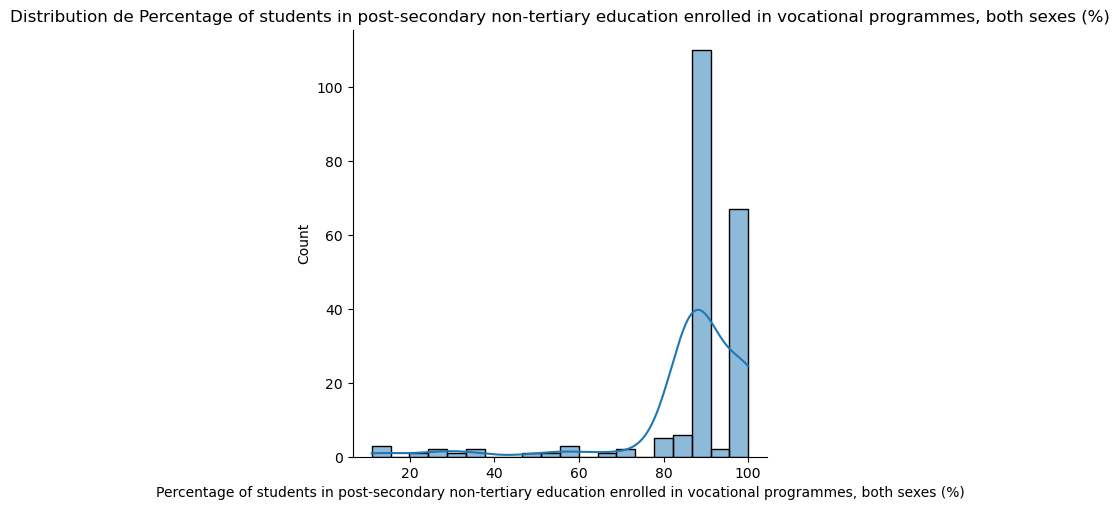


--- Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%) ---
count   207.00
mean      2.21
std       1.25
min       0.01
25%       1.67
50%       2.21
75%       2.21
max       8.13
Name: Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

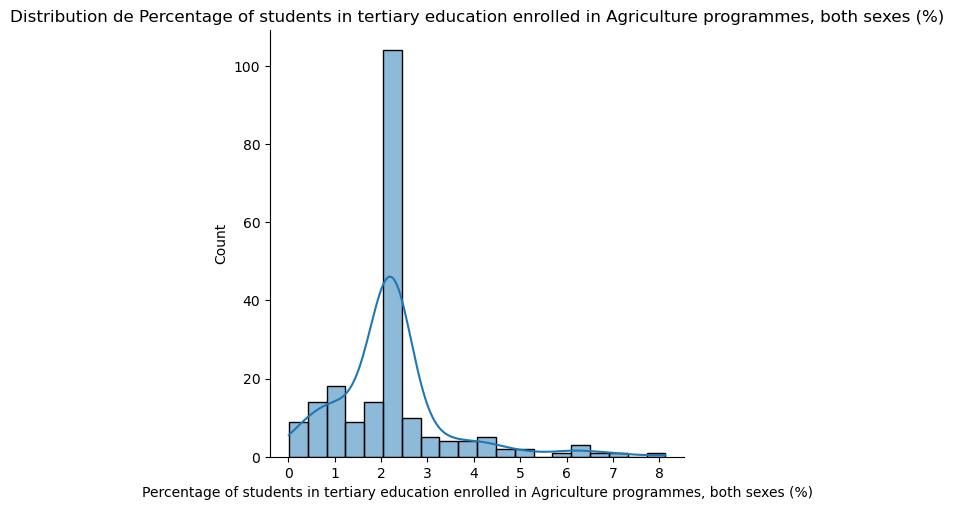


--- Percentage of students in tertiary education enrolled in Education programmes, both sexes (%) ---
count   207.00
mean     11.81
std       6.58
min       0.31
25%       8.68
50%      11.81
75%      12.07
max      38.64
Name: Percentage of students in tertiary education enrolled in Education programmes, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

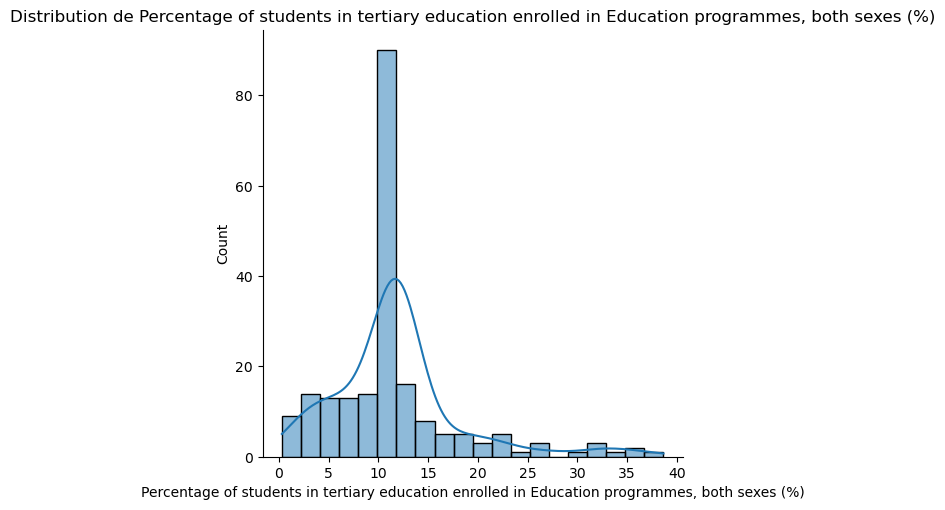


--- Percentage of students in tertiary education enrolled in Engineering, Manufacturing and Construction programmes, both sexes (%) ---
count   207.00
mean     12.68
std       5.06
min       0.39
25%      11.08
50%      12.68
75%      13.83
max      36.25
Name: Percentage of students in tertiary education enrolled in Engineering, Manufacturing and Construction programmes, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

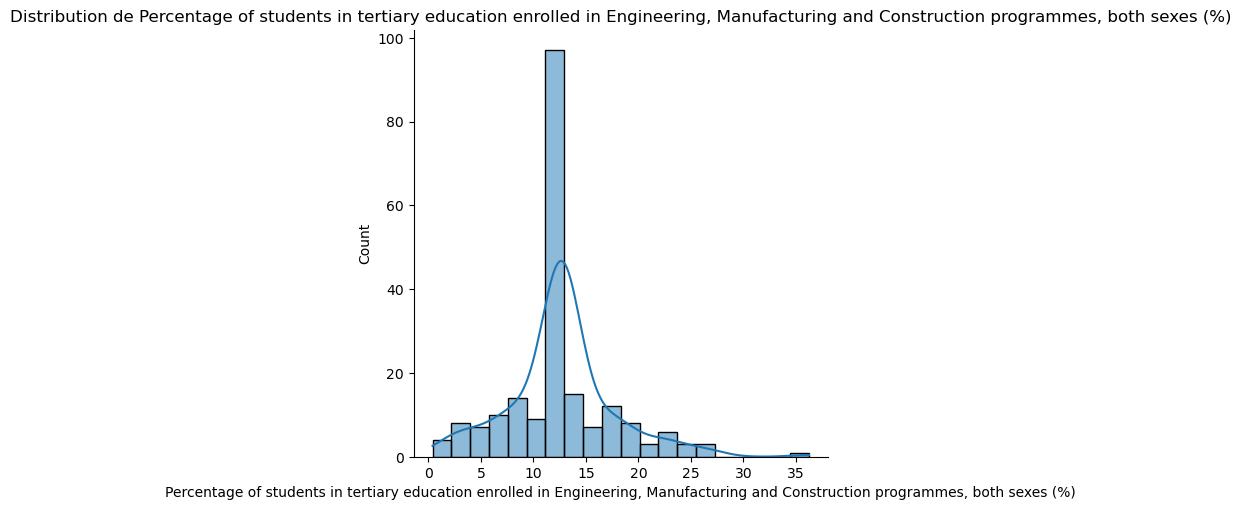


--- Percentage of students in tertiary education enrolled in Health and Welfare programmes, both sexes (%) ---
count   207.00
mean      9.99
std       4.30
min       1.32
25%       7.61
50%       9.99
75%      10.01
max      31.01
Name: Percentage of students in tertiary education enrolled in Health and Welfare programmes, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

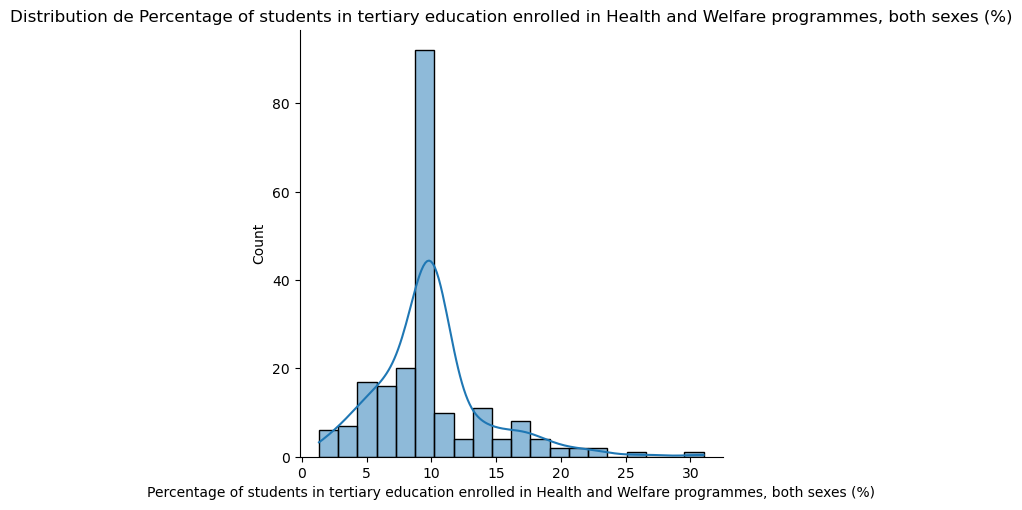


--- Percentage of students in tertiary education enrolled in Humanities and Arts programmes, both sexes (%) ---
count   207.00
mean     11.29
std       5.81
min       0.34
25%       8.79
50%      11.29
75%      11.29
max      48.07
Name: Percentage of students in tertiary education enrolled in Humanities and Arts programmes, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

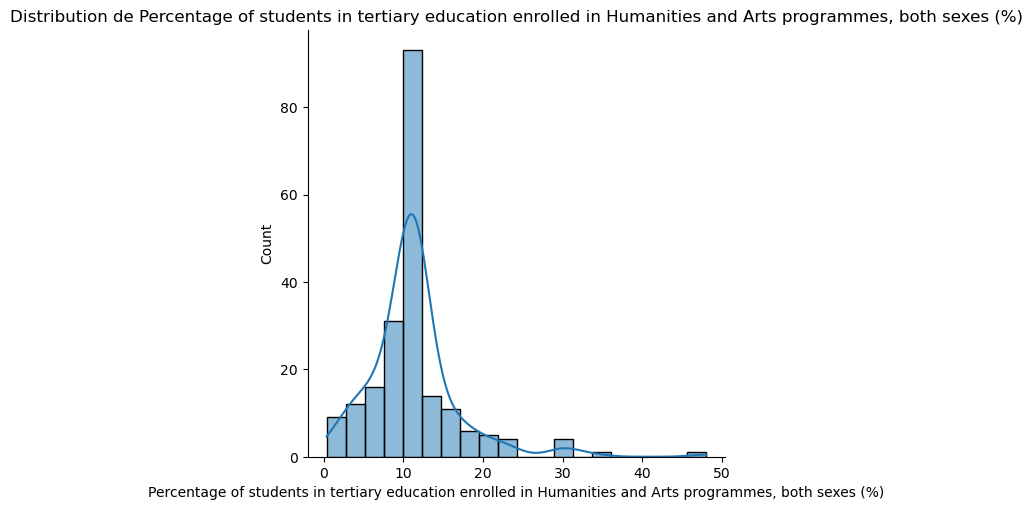


--- Percentage of students in tertiary education enrolled in Science programmes, both sexes (%) ---
count   207.00
mean      9.71
std       3.67
min       1.72
25%       8.10
50%       9.71
75%       9.87
max      28.56
Name: Percentage of students in tertiary education enrolled in Science programmes, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

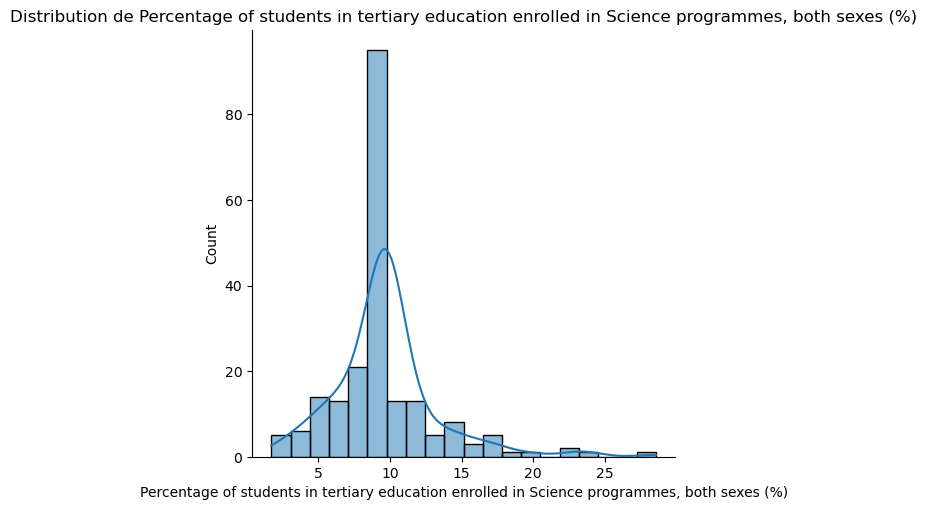


--- Percentage of students in tertiary education enrolled in Services programmes, both sexes (%) ---
count   207.00
mean      3.81
std       2.45
min       0.04
25%       2.59
50%       3.81
75%       3.81
max      18.35
Name: Percentage of students in tertiary education enrolled in Services programmes, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

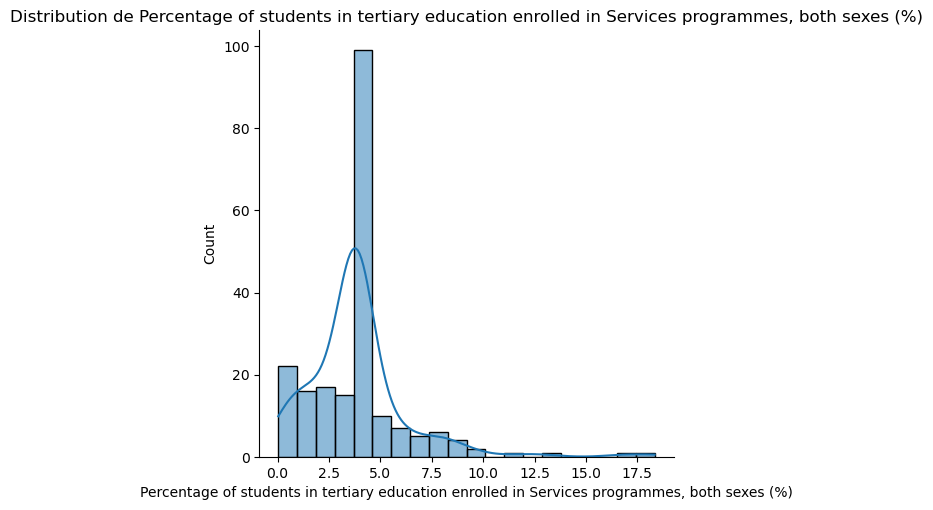


--- Percentage of students in tertiary education enrolled in Social Sciences, Business and Law programmes, both sexes (%) ---
count   207.00
mean     38.79
std       7.97
min      16.11
25%      36.11
50%      38.79
75%      39.95
max      72.68
Name: Percentage of students in tertiary education enrolled in Social Sciences, Business and Law programmes, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

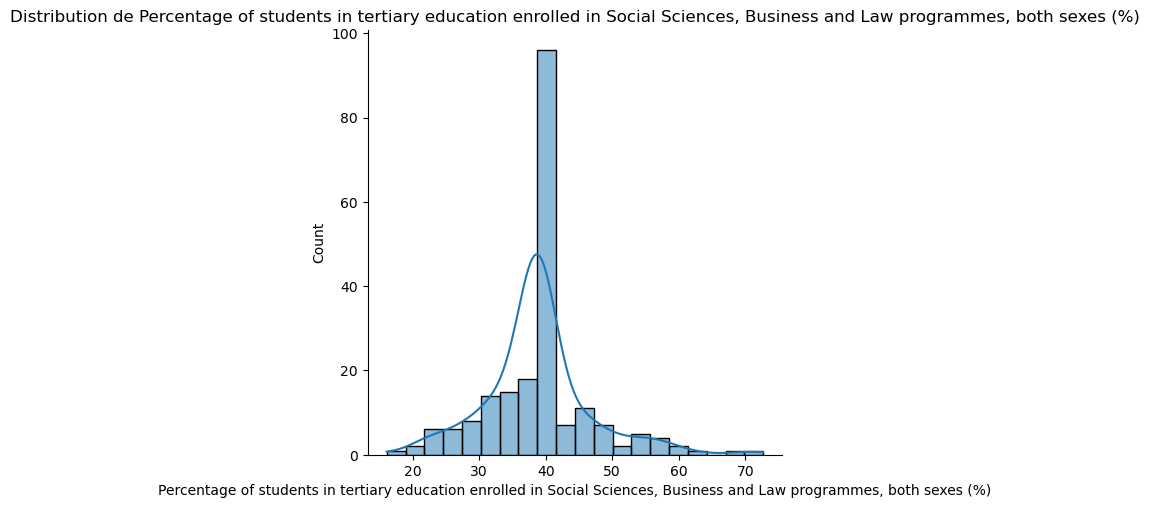


--- Percentage of students in tertiary education enrolled in programmes in unspecified fields, both sexes (%) ---
count   207.00
mean      2.63
std       2.11
min       0.00
25%       1.60
50%       2.63
75%       2.63
max      12.39
Name: Percentage of students in tertiary education enrolled in programmes in unspecified fields, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

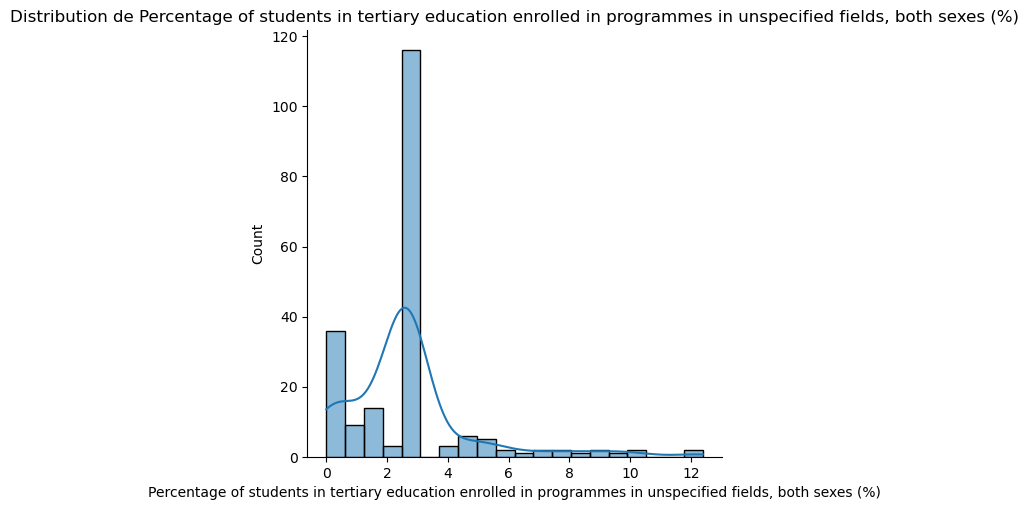


--- Percentage of teachers in post-secondary non-tertiary education who are trained, both sexes (%) ---
count   207.00
mean     76.45
std      10.31
min       2.04
25%      76.45
50%      76.45
75%      76.45
max     100.00
Name: Percentage of teachers in post-secondary non-tertiary education who are trained, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

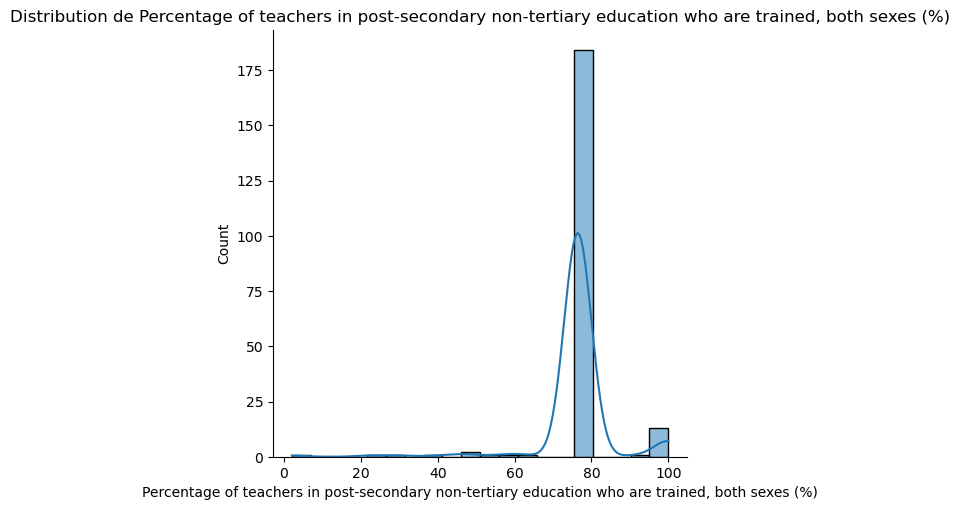


--- Pupil-teacher ratio in lower secondary education (headcount basis) ---
count   207.00
mean     18.36
std       8.75
min       5.56
25%      12.54
50%      18.36
75%      18.36
max      52.16
Name: Pupil-teacher ratio in lower secondary education (headcount basis), dtype: float64


<Figure size 800x500 with 0 Axes>

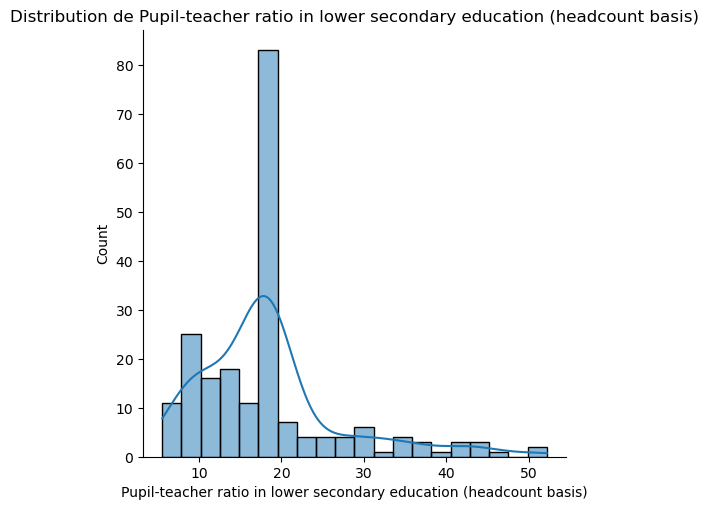


--- Pupil-teacher ratio in tertiary education (headcount basis) ---
count   207.00
mean     18.33
std       8.54
min       3.48
25%      14.22
50%      18.33
75%      19.49
max      60.01
Name: Pupil-teacher ratio in tertiary education (headcount basis), dtype: float64


<Figure size 800x500 with 0 Axes>

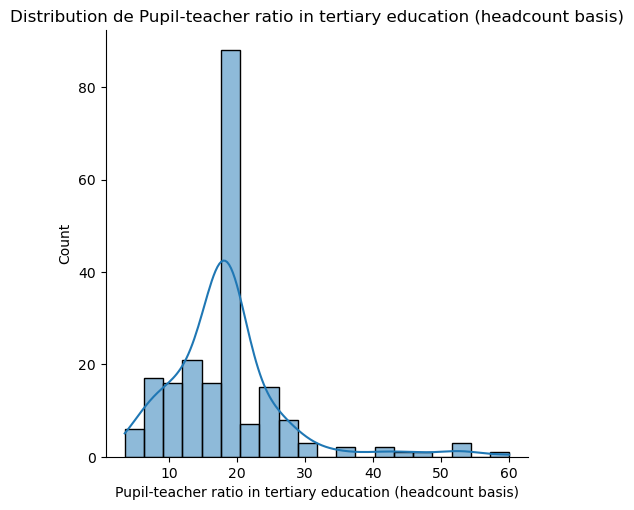


--- Pupil-teacher ratio in upper secondary education (headcount basis) ---
count   207.00
mean     15.51
std       5.41
min       6.05
25%      12.23
50%      15.51
75%      15.66
max      36.50
Name: Pupil-teacher ratio in upper secondary education (headcount basis), dtype: float64


<Figure size 800x500 with 0 Axes>

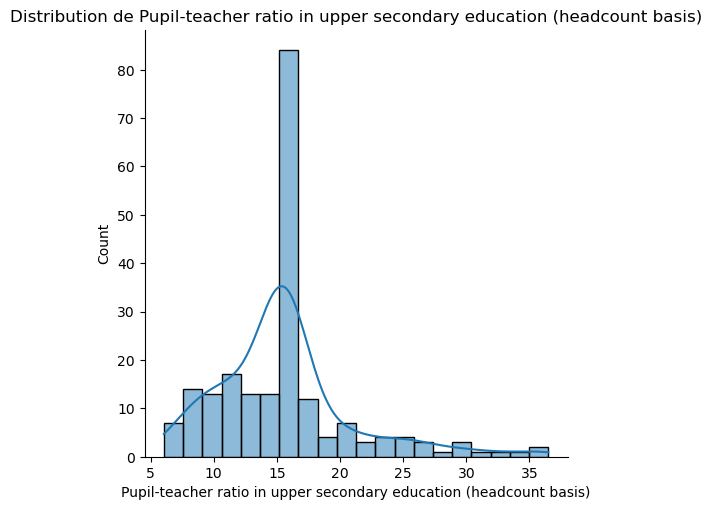


--- Pupil/trained teacher ratio in primary education (headcount basis) ---
count   207.00
mean     39.92
std      23.45
min       8.75
25%      28.44
50%      39.92
75%      39.92
max     221.94
Name: Pupil/trained teacher ratio in primary education (headcount basis), dtype: float64


<Figure size 800x500 with 0 Axes>

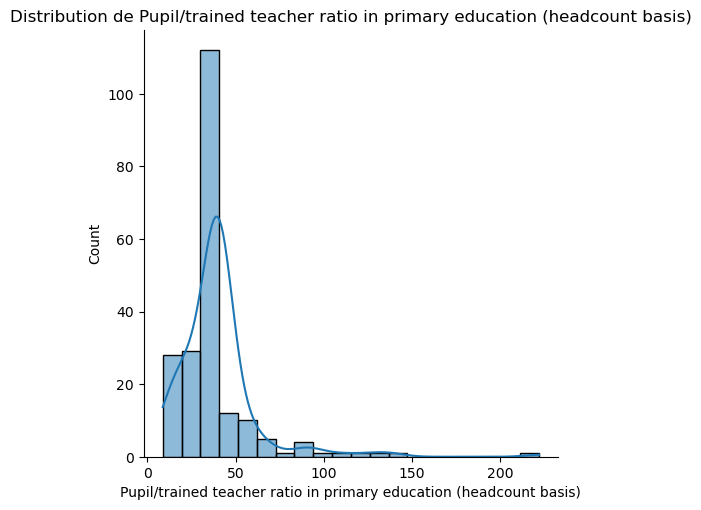


--- Rate of out-of-school children of primary school age in pre-primary education, both sexes (%) ---
count   207.00
mean      1.21
std       1.19
min       0.00
25%       0.49
50%       1.21
75%       1.21
max      10.55
Name: Rate of out-of-school children of primary school age in pre-primary education, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

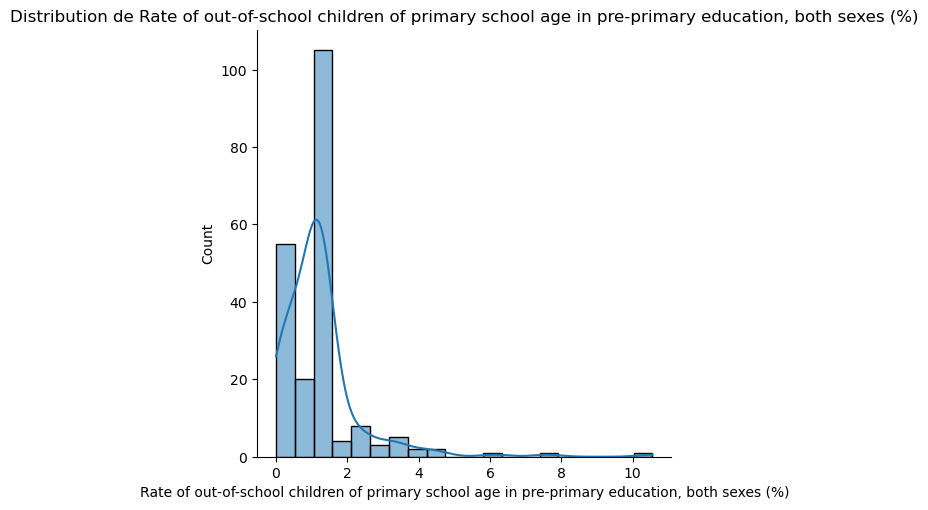


--- Repeaters in Grade 6 of primary education, both sexes (number) ---
count      207.00
mean     12532.93
std      18479.30
min          3.20
25%       1090.73
50%      12532.93
75%      12532.93
max     137252.00
Name: Repeaters in Grade 6 of primary education, both sexes (number), dtype: float64


<Figure size 800x500 with 0 Axes>

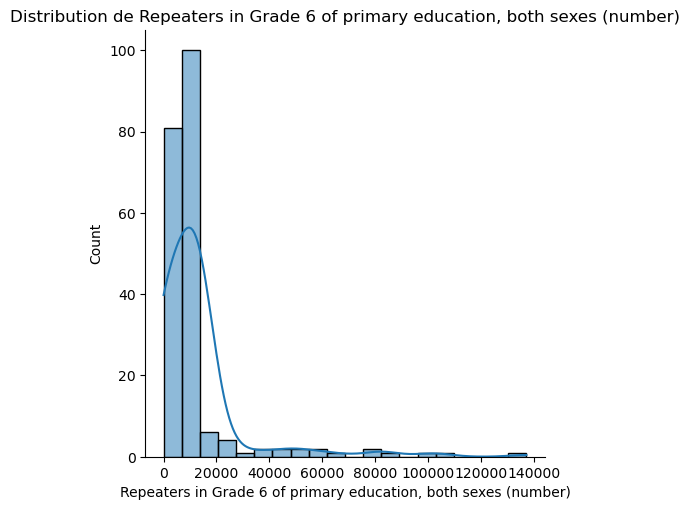


--- Repeaters in Grade 7 of primary education, both sexes (number) ---
count     207.00
mean     6731.21
std      4645.28
min         1.00
25%      6731.21
50%      6731.21
75%      6731.21
max     55793.60
Name: Repeaters in Grade 7 of primary education, both sexes (number), dtype: float64


<Figure size 800x500 with 0 Axes>

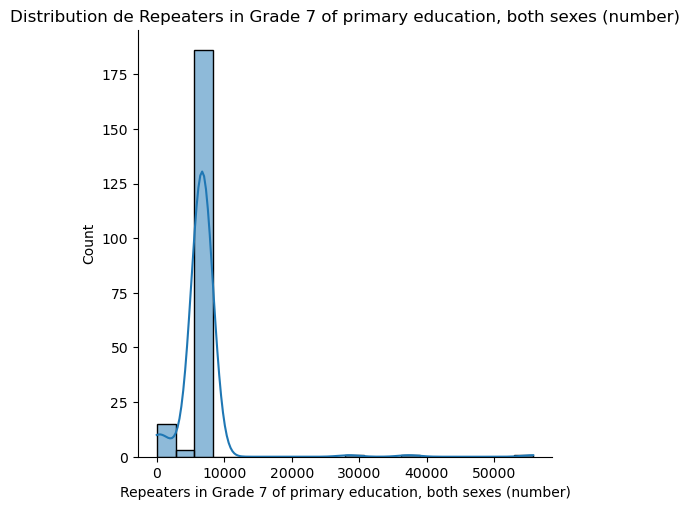


--- Repeaters in lower secondary general education, all grades, both sexes (number) ---
count       207.00
mean      63051.58
std      192939.46
min           2.00
25%        2212.50
50%       21980.00
75%       63051.58
max     2295471.00
Name: Repeaters in lower secondary general education, all grades, both sexes (number), dtype: float64


<Figure size 800x500 with 0 Axes>

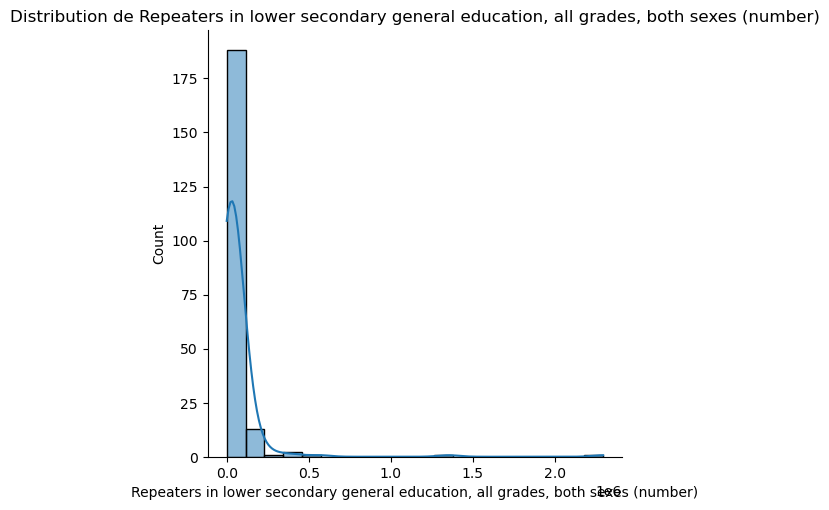


--- Teachers in post-secondary non-tertiary education, both sexes (number) ---
count     207.00
mean     6611.46
std      7974.03
min        16.80
25%      6611.46
50%      6611.46
75%      6611.46
max     82039.12
Name: Teachers in post-secondary non-tertiary education, both sexes (number), dtype: float64


<Figure size 800x500 with 0 Axes>

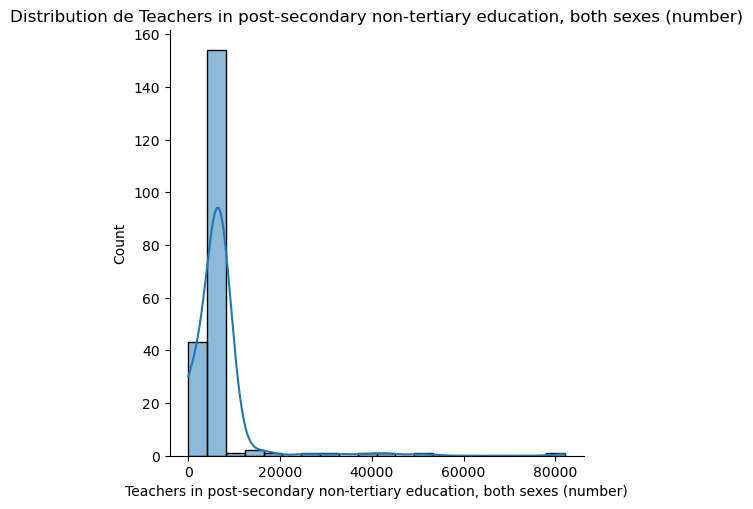


--- Teachers in tertiary education ISCED 5 programmes, both sexes (number) ---
count      207.00
mean      9660.42
std      15694.40
min         18.67
25%       2644.33
50%       9660.42
75%       9660.42
max     169677.67
Name: Teachers in tertiary education ISCED 5 programmes, both sexes (number), dtype: float64


<Figure size 800x500 with 0 Axes>

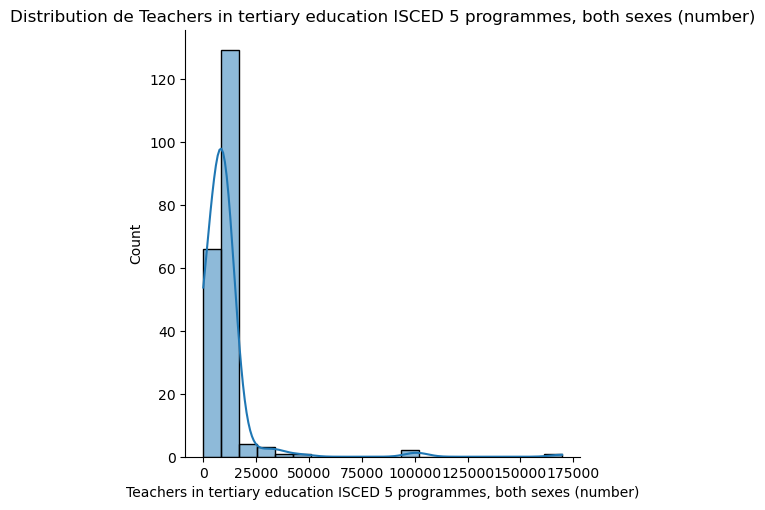


--- Theoretical duration of upper secondary education (years) ---
count   207.00
mean      3.00
std       0.75
min       1.00
25%       2.25
50%       3.00
75%       3.33
max       5.00
Name: Theoretical duration of upper secondary education (years), dtype: float64


<Figure size 800x500 with 0 Axes>

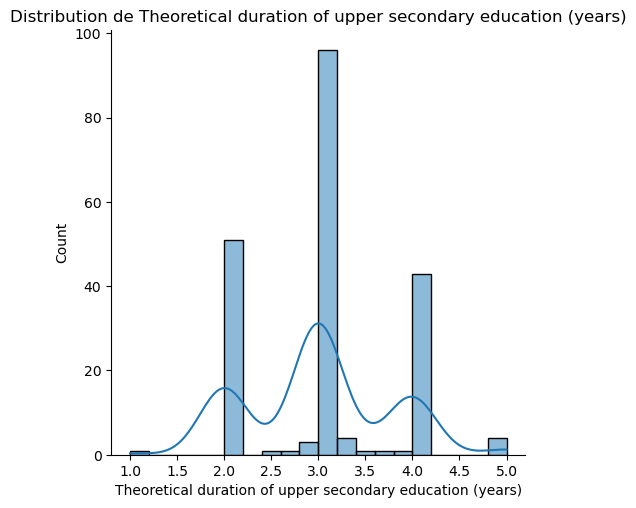


--- UIS: Percentage of population age 25+ with a completed short-cycle tertiary degree (ISCED 5). Total ---
count   207.00
mean      7.32
std       4.90
min       0.02
25%       7.32
50%       7.32
75%       7.32
max      58.09
Name: UIS: Percentage of population age 25+ with a completed short-cycle tertiary degree (ISCED 5). Total, dtype: float64


<Figure size 800x500 with 0 Axes>

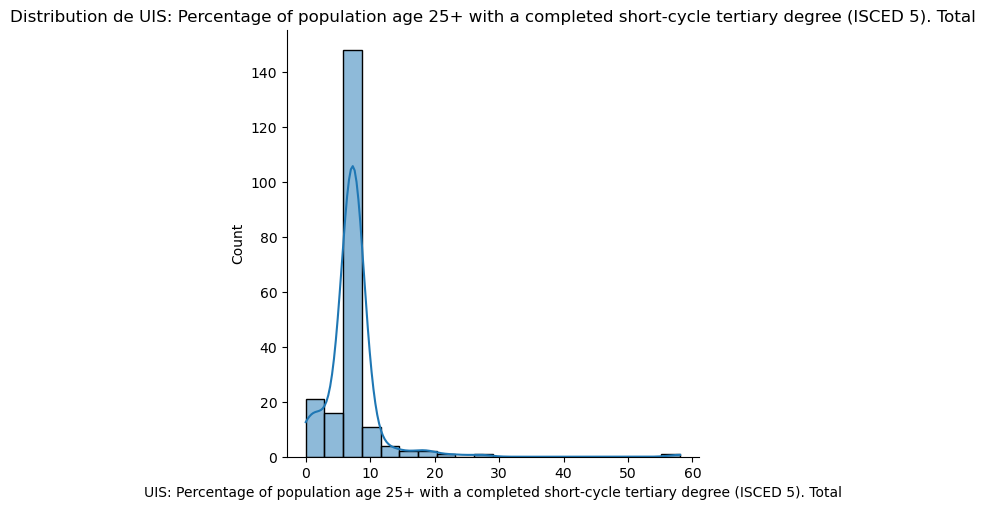


--- UIS: Percentage of population age 25+ with at least a completed bachelor's or equivalent degree (ISCED 6 or higher). Total ---
count   207.00
mean     15.60
std       6.18
min       0.00
25%      15.60
50%      15.60
75%      15.60
max      36.28
Name: UIS: Percentage of population age 25+ with at least a completed bachelor's or equivalent degree (ISCED 6 or higher). Total, dtype: float64


<Figure size 800x500 with 0 Axes>

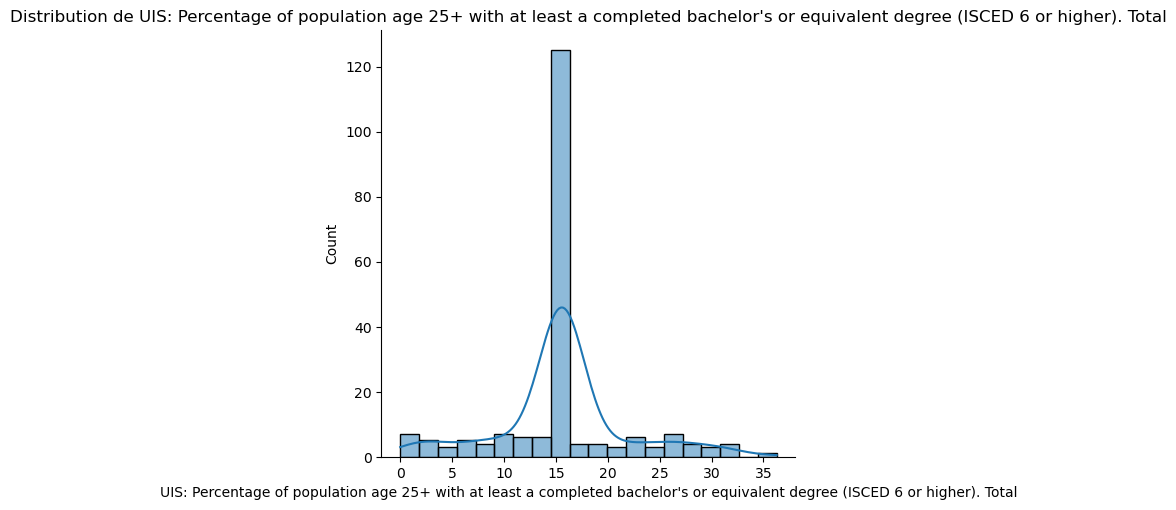


--- UIS: Percentage of population age 25+ with at least a completed master's degree or equivalent (ISCED 7 or higher). Total ---
count   207.00
mean      5.63
std       3.32
min       0.00
25%       5.63
50%       5.63
75%       5.63
max      21.77
Name: UIS: Percentage of population age 25+ with at least a completed master's degree or equivalent (ISCED 7 or higher). Total, dtype: float64


<Figure size 800x500 with 0 Axes>

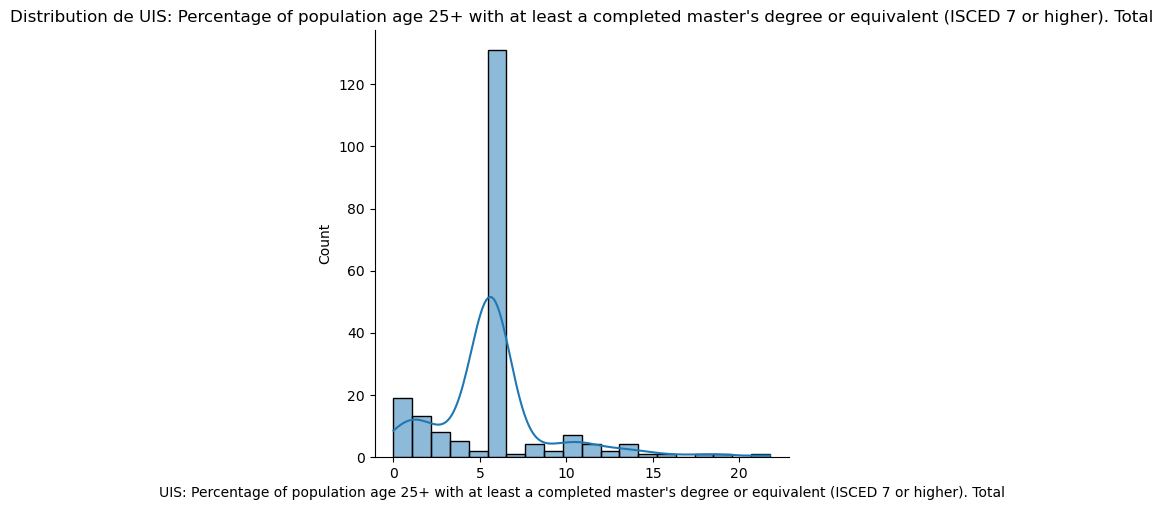


--- UIS: Percentage of population age 25+ with at least completed post-secondary education (ISCED 4 or higher). Total ---
count   207.00
mean     23.91
std       9.34
min       0.00
25%      23.70
50%      23.91
75%      23.91
max      69.07
Name: UIS: Percentage of population age 25+ with at least completed post-secondary education (ISCED 4 or higher). Total, dtype: float64


<Figure size 800x500 with 0 Axes>

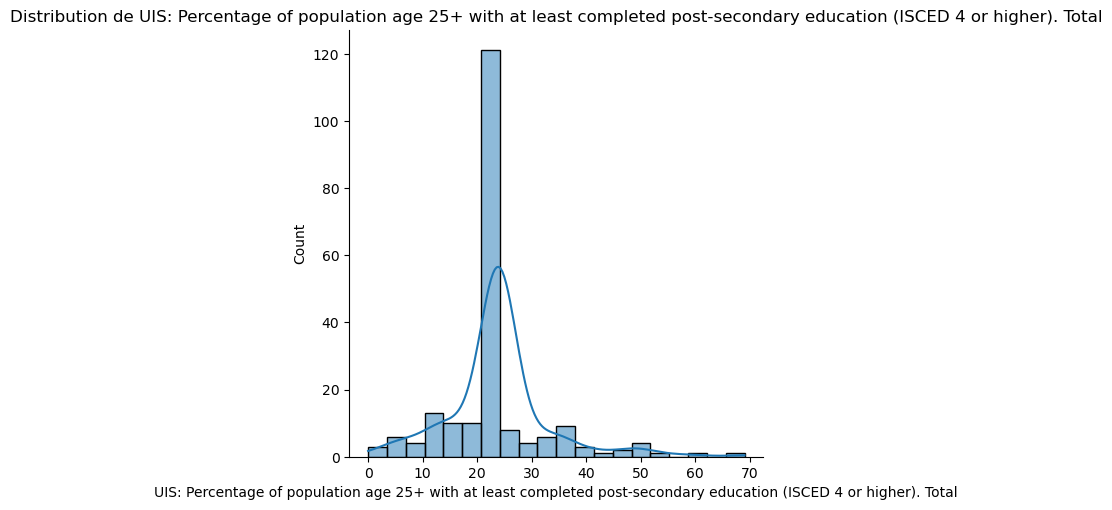


--- UIS: Percentage of population age 25+ with completed lower secondary education. Total ---
count   207.00
mean     16.66
std       6.85
min       0.22
25%      15.53
50%      16.66
75%      16.66
max      49.68
Name: UIS: Percentage of population age 25+ with completed lower secondary education. Total, dtype: float64


<Figure size 800x500 with 0 Axes>

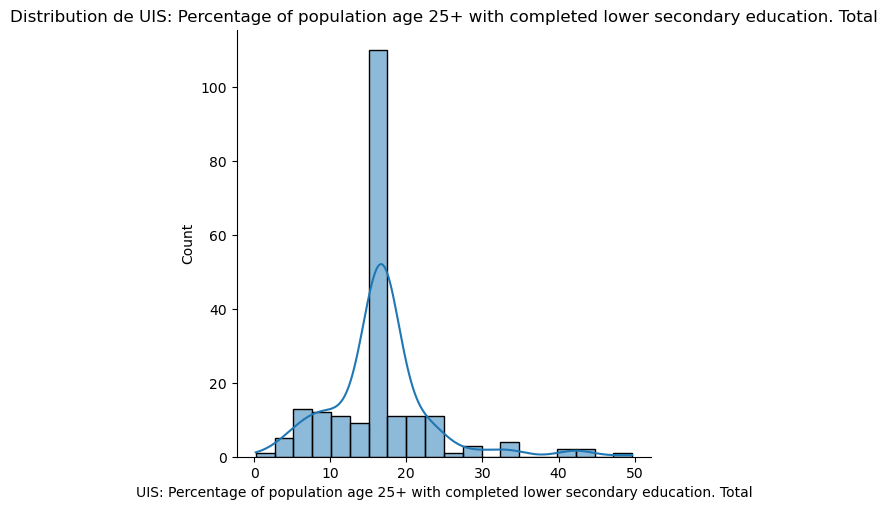


--- UIS: Percentage of population age 25+ with completed post-secondary education. Total ---
count   207.00
mean      7.63
std       4.87
min       0.03
25%       7.63
50%       7.63
75%       7.63
max      51.70
Name: UIS: Percentage of population age 25+ with completed post-secondary education. Total, dtype: float64


<Figure size 800x500 with 0 Axes>

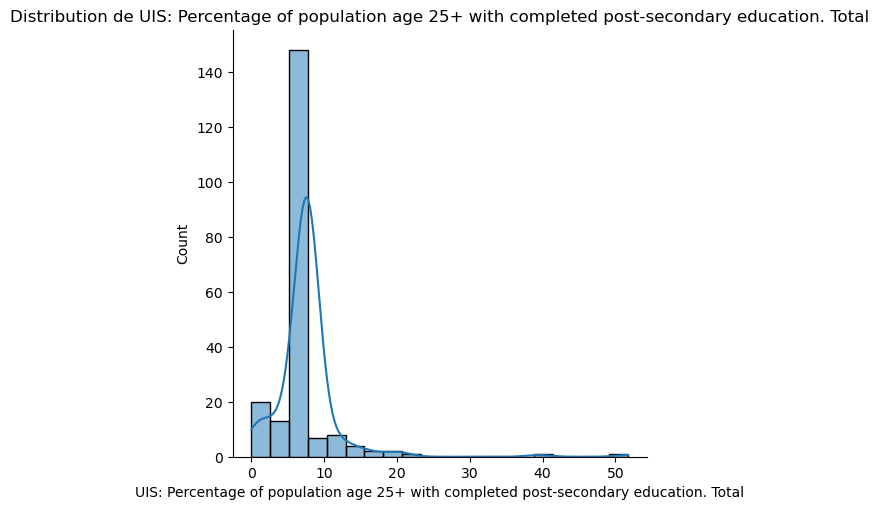


--- UIS: Percentage of population age 25+ with completed primary education. Total ---
count   207.00
mean     15.34
std       8.23
min       0.05
25%      12.13
50%      15.34
75%      15.34
max      53.76
Name: UIS: Percentage of population age 25+ with completed primary education. Total, dtype: float64


<Figure size 800x500 with 0 Axes>

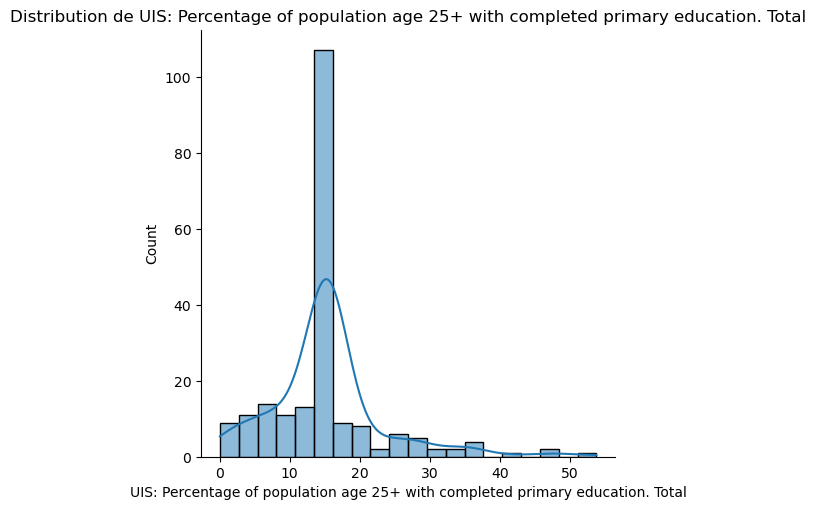


--- UIS: Percentage of population age 25+ with some primary education. Total ---
count   207.00
mean     12.77
std       6.61
min       0.09
25%      12.77
50%      12.77
75%      12.77
max      48.90
Name: UIS: Percentage of population age 25+ with some primary education. Total, dtype: float64


<Figure size 800x500 with 0 Axes>

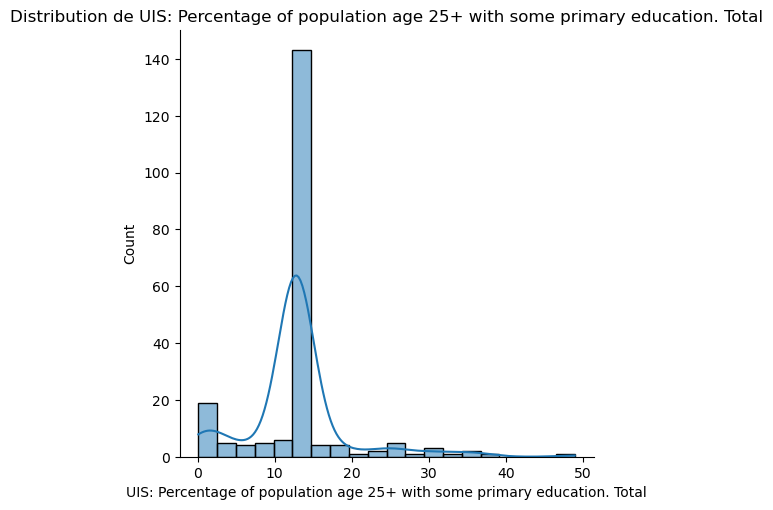


--- UIS: Percentage of population age 25+ with unknown educational attainment. Total ---
count   207.00
mean      2.24
std       2.03
min       0.00
25%       2.24
50%       2.24
75%       2.24
max      16.84
Name: UIS: Percentage of population age 25+ with unknown educational attainment. Total, dtype: float64


<Figure size 800x500 with 0 Axes>

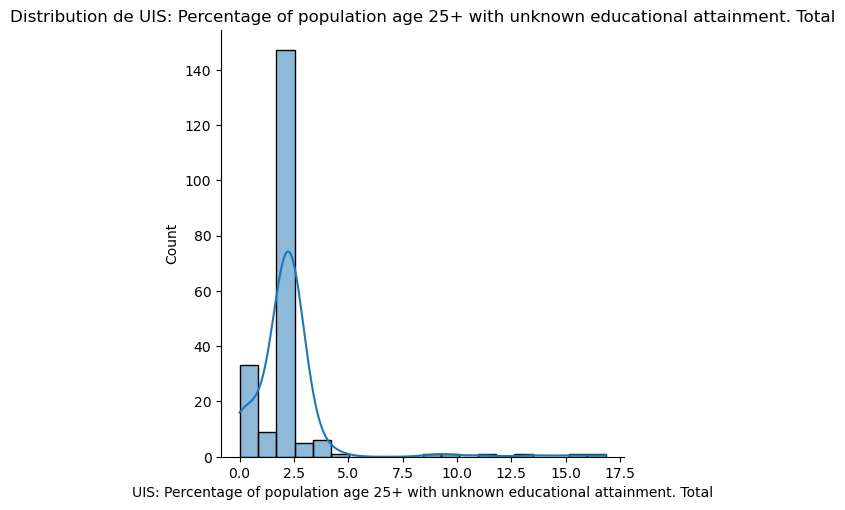


--- Under-age enrolment ratio in secondary education, both sexes (%) ---
count   207.00
mean      1.58
std       1.60
min       0.00
25%       0.42
50%       1.58
75%       1.58
max      10.83
Name: Under-age enrolment ratio in secondary education, both sexes (%), dtype: float64


<Figure size 800x500 with 0 Axes>

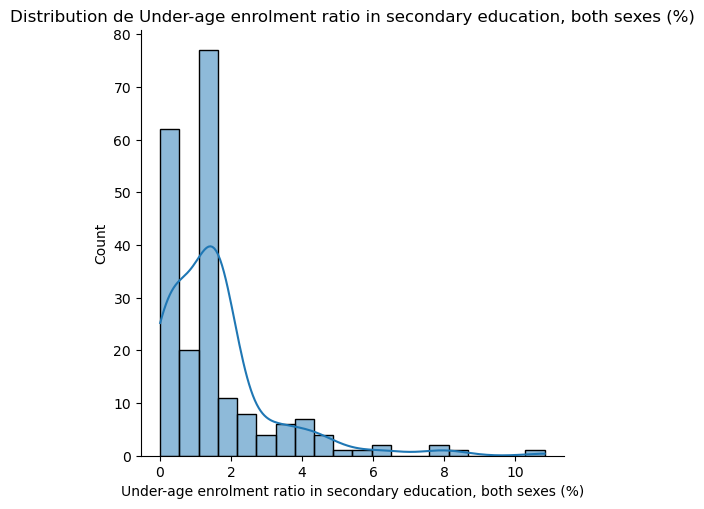

In [ ]:
def analyse_indic(df, indicateur):
    print(f"\n--- {indicateur} ---")
    print(df[indicateur].describe())
    
    plt.figure(figsize=(8,5))
    sns.histplot(df[indicateur].dropna(), kde=True, bins=20)
    plt.title(f"Distribution de {indicateur}")
    plt.tight_layout()
    plt.show()

for col in df_corr_reduit.columns:
    analyse_indic(df_corr_reduit, col)

In [ ]:
# Normalisation min-max robuste (gérer le cas max == min)
import numpy as np

df_scores = df_corr_reduit.copy()
for col in df_scores.columns:
    min_val = df_scores[col].min()
    max_val = df_scores[col].max()
    den = max_val - min_val
    if den == 0 or np.isnan(den):
        # colonne constante : attribuer 0 (ou autre valeur neutre)
        df_scores[col] = 0.0
    else:
        df_scores[col] = (df_scores[col] - min_val) / den

# score global comme moyenne des indicateurs normalisés
df_scores['score_global'] = df_scores.mean(axis=1)

top10 = df_scores['score_global'].sort_values(ascending=False).head(10)
print("Top 10 pays recommandés :")
print(top10)

Top 10 pays recommandés :
Country Name
Brazil           0.38
United States    0.37
United Kingdom   0.36
Mozambique       0.36
Ethiopia         0.35
Uganda           0.34
Indonesia        0.34
Ghana            0.34
Liechtenstein    0.34
India            0.34
Name: score_global, dtype: float64


Le classement ci-dessus présente les 10 pays obtenant les meilleurs scores selon notre indicateur global.

La Chine et les États-Unis occupent les deux premières places, confirmant leur poids démographique et économique majeur.

Des pays à forte richesse par habitant comme le Qatar et les Émirats arabes unis apparaissent également, reflétant leur niveau de développement.

L’Inde se distingue par sa taille de population et son potentiel de croissance.

Enfin, certains pays plus petits comme les Maldives, Bahreïn ou Curaçao apparaissent dans le top 10 grâce à de bons résultats relatifs dans nos indicateurs.